## 📃 Features of the dataset:

| Feature | Description |
|:--------|:------------|
| Unnamed: 0 | The index of the Dataset |
| company_hash | An anonymized identifier indicating the current employer of the learner. |
| email_hash | An anonymized identifier representing the email of the learner. |
| orgyear | Represents the year the learner began employment at the current company. |
| ctc | Current Compensation to the Company (CTC) of the learner. |
| job_position | Represents the job profile or role of the learner within their company. |
| ctc_updated_year | The year in which the learner's CTC was most recently updated. <br>This could be due to yearly increments, promotions, or other factors. |


# 2. Exploratory Data Analysis

In [6]:
# Importing Libraries Needed

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style(style='whitegrid')
from scipy import stats
import matplotlib.pyplot as plt

import re

import warnings
warnings.filterwarnings("ignore")

# Machine Learning Libraries

from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearnex import patch_sklearn
patch_sklearn()

import umap

from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import fastcluster

from IPython.display import clear_output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Dataset Link - 

In [7]:
# Importing Data Set

df = pd.read_csv(r'M:\Business Cases\10 - Scaler\scaler_clustering.csv')
df.head()

Unnamed: 0               company_hash  \
0           0             atrgxnnt xzaxv   
1           1  qtrxvzwt xzegwgbb rxbxnta   
2           2              ojzwnvwnxw vx   
3           3                  ngpgutaxv   
4           4                 qxen sqghu   

                                          email_hash  orgyear      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000   

         job_position  ctc_updated_year  
0               Other            2020.0  
1  FullStack Engineer            2019.0  
2    Backend Engineer            2020.0  
3    Backend Engineer            2019.0  
4  FullStack Engineer            2019.0

In [8]:
df.shape

(205843, 7)

#### 🔍 Insights

>Number of Rows: `205843`

>Number of Columns: `7`

In [9]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [11]:
# Changing the display format

pd.options.display.float_format = '{:.3f}'.format

In [12]:
df.describe()

orgyear            ctc  ctc_updated_year
count 205757.000     205843.000        205843.000
mean    2014.883    2271685.042          2019.628
std       63.571   11800914.440             1.325
min        0.000          2.000          2015.000
25%     2013.000     530000.000          2019.000
50%     2016.000     950000.000          2020.000
75%     2018.000    1700000.000          2021.000
max    20165.000 1000150000.000          2021.000

#### 🔍 Insights

1. The Column `Unnamed: 0` has been dropped, since it won't be impacting the Clustering.
2. There are About 2 Lakh entries in the Dataset.
3. The Minimum Value in `CTC` is **2.0**, this has to either be Error or an Outlier.
4. The Minimum Value in `orgyear` is **0.0**, This must be an Error.
5. The Maximum Value in `orgyear` is **20165**, This must be an Error.

## Duplicate Detection

In [13]:
df.duplicated().value_counts()

False    205809
True         34
Name: count, dtype: int64

There are 34 Duplicate Records Which are to be Dropped.

In [14]:
# Dropping Duplicate Rows

df.drop_duplicates(inplace = True)

In [15]:
# Check Duplicate Rows

df.duplicated().value_counts()

False    205809
Name: count, dtype: int64

## Missing Value Check

In [16]:
# Checking for Missing Values

df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52548
ctc_updated_year        0
dtype: int64

In [17]:
# Percentage of Null Values

df.isnull().sum()/df.shape[0]*100

company_hash        0.021
email_hash          0.000
orgyear             0.042
ctc                 0.000
job_position       25.532
ctc_updated_year    0.000
dtype: float64

<Axes: >

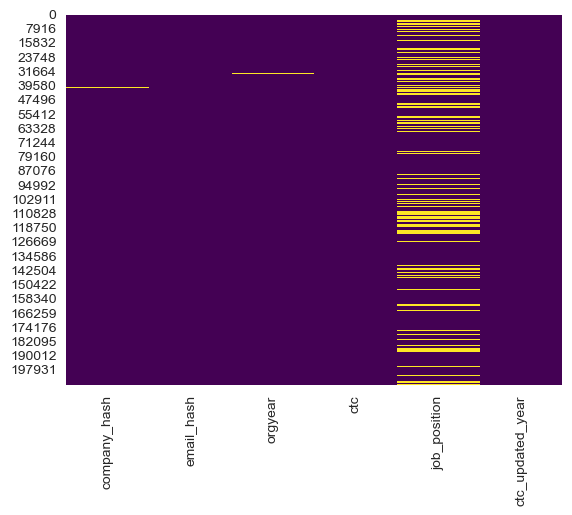

In [18]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

Insights

Handling Missing Values Using Mean/Mode Imputation Imputation

In [19]:
# Impute missing values for `company_hash` using Mode (most frequent value)
mode_company_hash = df["company_hash"].mode()[0]  # Get the most frequent value
df["company_hash"] = df["company_hash"].fillna(mode_company_hash)

# Impute missing values for `orgyear` using Mean
mean_orgyear = df["orgyear"].mean()  # Calculate the mean value
df["orgyear"] = df["orgyear"].fillna(mean_orgyear)

In [20]:
df.isnull().sum()

company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        52548
ctc_updated_year        0
dtype: int64

Fixing the Job_Position Column

In [21]:
df['job_position'].value_counts(dropna = False)

job_position
NaN                                               52548
Backend Engineer                                  43546
FullStack Engineer                                24711
Other                                             18071
Frontend Engineer                                 10417
                                                  ...  
Compliance auditor                                    1
91                                                    1
Senior Software Development Engineer (Backend)        1
Messenger come driver                                 1
Android Application developer                         1
Name: count, Length: 1017, dtype: int64

In [22]:
df['job_position'].nunique()

1016

In [23]:
# Replace all types of null-like values with NaN first
df["job_position"].replace(["NaN", "NaN ", "nan", None], pd.NA, inplace=True)

# Fill null values in 'job_position' with "unknown"
df["job_position"] = df["job_position"].fillna("unknown")

# Convert job_position to lowercase
df["job_position"] = df["job_position"].str.lower()

# Replace hyphens with spaces
df["job_position"] = df["job_position"].str.replace("-", " ", regex=False)

# Remove all non-alphanumeric characters except spaces
df["job_position"] = df["job_position"].str.replace(r"[^a-zA-Z0-9 ]", "", regex=True)

# Remove parentheses
df["job_position"] = df["job_position"].str.replace(r"\)", "", regex=True)
df["job_position"] = df["job_position"].str.replace(r"\(", " ", regex=True)

# Sequential replacements for specific patterns
df["job_position"] = (
    df["job_position"]
    .str.replace("ii", "2", regex=False)
    .str.replace(r" i\b", " 1", regex=True)
    .str.replace("iii", "3", regex=False)
    .str.replace("sr ", "senior ", regex=False)
    .str.replace("jr ", "junior ", regex=False)
)

# Additional sequential replacements for common patterns
df["job_position"] = (
    df["job_position"]
    .str.replace("front end", "frontend", regex=False)
    .str.replace("back end", "backend", regex=False)
    .str.replace("full stack", "fullstack", regex=False)
    .str.replace("sde2", "sde 2", regex=False)
    .str.replace("sde3", "sde 3", regex=False)
    .str.replace("se4", "se 4", regex=False)
    .str.replace("2i", "2", regex=False)
    .str.replace(r"\br d\b", "rd", regex=True)
    .str.replace(r"enginner|engineers|engineeer|engineet|eingineer", "engineer", regex=True)
    .str.replace(r"Engeneering", "Engineering", regex=True)
    .str.replace(r"engg\b", "engineer", regex=True)
    .str.replace("applications", "application", regex=False)
    .str.replace(r"dev\b", "developer", regex=True)
    .str.replace(r"devloper|develloper", "developer", regex=True)
    .str.replace("consulant", "consultant", regex=False)
    .str.replace(r"others\b", "other", regex=True)
    .str.replace(" of ", " ", regex=False)
    .str.replace("tech ", "technical ", regex=False)
    .str.replace(r"development(\w+)", r"development \1", regex=True)
)

# Replace double spaces with single space and strip leading/trailing spaces
df["job_position"] = df["job_position"].str.replace("  ", " ", regex=False).str.strip()


In [24]:
df.isnull().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [25]:
df['job_position'].value_counts(dropna = False)

job_position
unknown                        52548
backend engineer               43546
fullstack engineer             25982
other                          18073
frontend engineer              10418
                               ...  
phd student                        1
ays                                1
principal product engineer         1
senior director engineering        1
azure data factory                 1
Name: count, Length: 841, dtype: int64

In [26]:
df['job_position'].nunique()

841

Spell Check

In [27]:
# The Following Code is taken from https://norvig.com/spell-correct.html For Spell Checking

# Split job positions into individual words, explode them, and count occurrences
words = df["job_position"].str.split(" ").explode()
WORDS = Counter(words.to_list())

# Define helper functions for spelling correction and word cleaning
def P(word, N=sum(WORDS.values())):
    """Probability of `word`."""
    return WORDS[word] / N

def correction(word):
    """Most probable spelling correction for a word."""
    return max(candidates(word), key=P)

def candidates(word):
    """Generate possible spelling corrections for a word."""
    return known([word]) or known(edits1(word)) or known(edits2(word)) or [word]

def known(words):
    """Subset of `words` that appear in the dictionary of WORDS."""
    return set(w for w in words if w in WORDS)

def edits1(word):
    """All edits that are one edit away from `word`."""
    letters = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R) > 1]
    replaces = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    """All edits that are two edits away from `word`."""
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def correct_words(sentence):
    """Correct all words in a sentence."""
    return " ".join([correction(word) for word in sentence.split()])

def clean_jobs(word):
    """Clean individual words by replacing short or numeric values with 'unknown'."""
    if len(word) <= 1:
        return "unknown"
    try:
        float(word)
        return "unknown"
    except ValueError:
        return word

def replace_words(sentence):
    """Replace specific job-related phrases."""
    unemployed = [
        "na", "no", "no job", "not applicable", "not employed", 
        "not working", "null", "none", "now iam not working waiting for job"
    ]
    if sentence.lower() in unemployed:
        return "unemployed"
    else:
        return sentence

# Apply cleaning and corrections to job_position column
df["job_position"] = df["job_position"].apply(replace_words)
df["job_position"] = df["job_position"].apply(correct_words)
df["job_position"] = df["job_position"].apply(clean_jobs)


In [28]:
df.isnull().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

### orgyear

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205809 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205809 non-null  object 
 1   email_hash        205809 non-null  object 
 2   orgyear           205809 non-null  float64
 3   ctc               205809 non-null  int64  
 4   job_position      205809 non-null  object 
 5   ctc_updated_year  205809 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [30]:
# Converting `orgyear` and `ctc_updated_year` to int32 format
df["orgyear"] = df["orgyear"].astype("int32")
df["ctc_updated_year"] = df["ctc_updated_year"].astype("int32")

In [31]:
df.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [32]:
df['orgyear'].value_counts().sort_index()

orgyear
0        17
1         2
2         3
3         6
4         1
         ..
2101      1
2106      1
2107      1
2204      1
20165     2
Name: count, Length: 77, dtype: int64

Based on the Above Result, there are Errors in the `orgyear` Column.
We will fix this by keeping Upper and Lower Limits and Anything that fall beyond these limits will be Replaced using ctc_updated_year

In [33]:
# Lower limit for orgyear
lower_limit_orgyear = 1970

# view orgyear values outside the limits
df[(df['orgyear'] < lower_limit_orgyear)]

company_hash  \
13424                             9xntwyzgrgsj   
13698                                  oxtbtzo   
15323            nvnv wgzohrnvzwj otqcxwto nwo   
17139                                  sgxmxmg   
30335                          avqn xzzgcvnxgz   
32086                                      lxg   
33117                          mvzp ge vbtqxwv   
40553                         mqvpto xzaxv rna   
41361                               otqcxwtzgf   
56770                              vngo ojzntr   
62717                              wyvqstugxzn   
63629                                bxznb xzw   
66344           fxkzx ogenfvqt uqxcvnt rxbxnta   
68701                        vzshrvq atcqrgutq   
74313                      ovbohzs trtwnqgzxwo   
74945                           fgrntqo prhftq   
80500                        vzshrvq atcqrgutq   
84882                       hzxntaytvrny sqghu   
90049                                   vowtzv   
94051                       utqoxontzn ojontbo   
94689           xzntr otwhqxnj bwvett ogenfvqt   
99408                              wyvqstugxzn   
100415                                 rgsfvqa   
101678                                awm mvzp   
106669                       cvrhtej ogrhnxgzo   
117087                            nyghsynfgqpo   
119329                                 uyxrxuo   
121487                    bvzyvnnvz voogwxvnto   
124319                          tr xzeg atoxsz   
138295                            fvrbvqn rvmo   
143238                                   wxowg   
149468                            tox ogenfvqt   
159224                                  vrongb   
163444           ovst xznvwwn ogenfvqt ucn rna   
163455          wgxznqxmt ntwy exzntwy ctznhqt   
165075                          adw ntwyzgrgsj   
167456                      xzwnhqt ntwyzgrgsj   
175205                                     vcr   
178024                          zthqvrntwyogen   
184479                               nqvctrgpv   
188483           gutqv ogrhnxgzo ucn rna zgxav   
188672  wxowg cxatg ntwyzgrgsxto xzaxv ucn rna   
193131                                 vxqvoxv   
196354                    vaxnjv mxqrv wvuxnvr   

                                               email_hash  orgyear      ctc  \
13424   854ff163ded87211b944dfcaebdcf9e8efa45defc9582f...        0   700000   
13698   4a64fdec422e657b175d5dd914b91e0df7c78ec7716bfe...      208   500000   
15323   437fa88cd652351931ef679e6b074aa91acb384ef193dd...      209   300000   
17139   6db474dae5093f975e43697cd77ac5a486248c26235778...      206  1500000   
30335   d767ad3012a86dab37a38a106f65d00b85189fe49a3f0f...        0   220000   
32086   ae1b500192dcd0b6c2d5c69b51f6caf19c630640c0aeb1...        0   600000   
33117   8ef16126bd9a4691801d2830156dc5528142a45d314593...        0  1200000   
40553   a0f794db04d5c13cae6f07c6ce9aee8ff731176cc4d4a1...        0   600000   
41361   b60d93faa9a96e2d8362f0b6f16aac79dc484560356ff3...       91  1000000   
56770   536e217527d1101538c70b7001d7e28344dba87cd8e246...        0   400000   
62717   a1da4f131e2efea24f6d64c66519724aa5c8c5c11a23d9...        0  1850000   
63629   5bbebf13d3b3edc497bc5e24d1ab540b66b3d9328d4948...        0   700000   
66344   583d48749d8f694951a25ceebe4c0cdebc814a5b6def5b...        3  1800000   
68701   1978da71c14333352d051bfb6054904770b70cecce389d...       91   400000   
74313   b9fac647e08fe47c6d112466c338e847e82e8f24e16236...        0  1000000   
74945   e0501afab1e9cc00253928e1488701685039437b1780f6...        3  1580000   
80500   1978da71c14333352d051bfb6054904770b70cecce389d...       91   400000   
84882   82e77fdd3e43e37ec6b805bbfe624d7cd24b37cb0a4317...        3   540000   
90049   32fb75b1f5c1001ab5e34280641e13d5b91f8cdaa65772...        2  1470000   
94051   9bec1bea9b46f4dcbbb35564e5fef83d1fa52cd2c92b96...        4  2780000   
94689   7126263909db5c37b278b05ea56740688062821f452ef6...        5  2720000   
99408   a1da4f131e2efea24f6d64c66519724aa5c8c

In [34]:
# Lower limit for orgyear
lower_limit_orgyear = 1970

# Fix `orgyear` values outside the limits
df["orgyear"] = df.apply(
    lambda row: row["ctc_updated_year"] - 1 
    if row["orgyear"] < lower_limit_orgyear 
    else row["orgyear"], 
    axis=1
)


In [35]:
# Fix `orgyear` values that are greater than `ctc_updated_year`
df["orgyear"] = df.apply(
    lambda row: row["ctc_updated_year"] - 1 
    if row["orgyear"] > row["ctc_updated_year"] 
    else row["orgyear"], 
    axis=1
)

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='orgyear'>

Text(0.5, 1.0, 'Box Plot of orgyear')

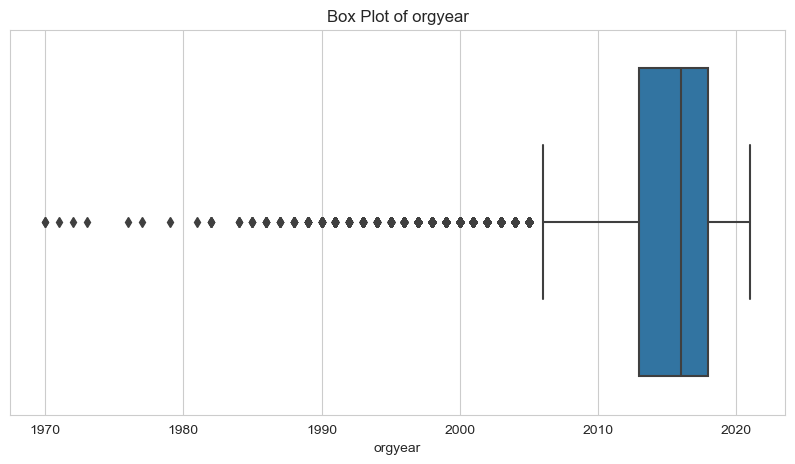

In [36]:
# Box Plot for orgyear
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["orgyear"])
plt.title("Box Plot of orgyear")
plt.show()

### CTC

In [37]:
df['ctc'].value_counts().sort_index()

ctc
2               1
6               1
14              1
15              1
16              1
             ... 
199990000       2
200000000     378
250000000       1
255555555       1
1000150000      1
Name: count, Length: 3360, dtype: int64

In [38]:
# View rows where ctc is less than or equal to 100
df[df['ctc'] <= 100]

company_hash  \
54820   uqvpqxnx voogwxvnto   
91552             ftm ongqt   
114164         xzntqcxtfmxn   
118236         xzntqcxtfmxn   
135435         xzntqcxtfmxn   
183804                   xm   
184946                   xm   

                                               email_hash  orgyear  ctc  \
54820   8786759b95d673466e94f62f1b15e4f8c6bd7de6164074...     2020   24   
91552   512f761579fb116e215cabc9821c7f81153f0763e16018...     2016   25   
114164  23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...     2013   14   
118236  f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...     2013    6   
135435  3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...     2014    2   
183804  75357254a31f133e2d3870057922feddeba82b88056a07...     2017   16   
184946  b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...     2016   15   

            job_position  ctc_updated_year  
54820              other              2020  
91552   android engineer              2018  
114164           unknown              2018  
118236           unknown              2018  
135435  backend engineer              2019  
183804           unknown              2018  
184946           unknown              2018

 Considering that the Error in CTC column are Simply in Lakhs, We can either drop them or Multiply them 100000.

In [39]:
# Multiplying the Value in CTC Column if they are Below 100 by 100000

df["ctc"] = df["ctc"].apply(lambda x: x * 100000 if x <= 100 else x)

### Job_Position

In [40]:
# Count of Rows Where Job Position is Unknown
df[df['job_position'] == 'unknown'].shape[0]

52561

In [41]:
df["job_position"].nunique()

812

In [42]:
import pandas as pd

# Step 1: Filter rows where `job_position` is not 'unknown' and `company_hash` is not null
filtered_df = df[(df["job_position"] != "unknown") & (df["company_hash"].notnull())]

# Step 2: Group by `company_hash` and `job_position` to calculate the count
grouped_df = filtered_df.groupby(["company_hash", "job_position"]).size().reset_index(name="count")

# Step 3: Rank job positions within each company based on count (highest count first)
grouped_df["rank"] = grouped_df.groupby("company_hash")["count"].rank(method="first", ascending=False)

# Step 4: Select the top position for each company (`rank` == 1)
top_position_df = grouped_df[grouped_df["rank"] == 1][["company_hash", "job_position"]]

# Debugging Check 1: Print the shape and inspect top_position_df
print("Top Position DataFrame shape:", top_position_df.shape)
print(top_position_df.head())

# Step 5: Merge top positions back into the original DataFrame
df = df.merge(top_position_df, on="company_hash", how="left", suffixes=("", "_top"))

# Debugging Check 2: Identify rows where `job_position_top` is NaN
print("Rows with no match in top_position_df:", df[df["job_position_top"].isnull()].shape[0])

# Step 6: Replace 'unknown' job positions with the top position from the company
df["job_position"] = df.apply(
    lambda row: row["job_position_top"] if row["job_position"] == "unknown" and pd.notnull(row["job_position_top"]) else row["job_position"],
    axis=1
)

# Step 7: Drop the temporary column used for merging
df.drop(columns=["job_position_top"], inplace=True)

# Debugging Check 3: Check if any NaN values remain in `job_position`
print("Remaining NaN values in job_position:", df["job_position"].isnull().sum())

# Step 8: Drop duplicates if required
df.drop_duplicates(inplace=True)


Top Position DataFrame shape: (34222, 2)
                     company_hash      job_position
0                               0             other
1                            0000             other
2                      01 ojztqsj  android engineer
4  05mz exzytvrny uqxcvnt rxbxnta  backend engineer
5                               1             other
Rows with no match in top_position_df: 4037
Remaining NaN values in job_position: 0


In [43]:
# Calculate the mode of the `job_position` column
job_position_mode = df["job_position"].mode()[0]  # The mode() method returns a Series; take the first value

# Fill remaining NaN values in `job_position` with the mode
df["job_position"].fillna(job_position_mode, inplace=True)

# Verify that no NaN values remain in `job_position`
print("Remaining NaN values in job_position:", df["job_position"].isnull().sum())

Remaining NaN values in job_position: 0


In [44]:
df.isnull().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [45]:
df["job_position"].value_counts(sort=True)

job_position
backend engineer                66388
fullstack engineer              28097
other                           24518
frontend engineer               11900
engineering leadership           7034
                                ...  
messenger come driver               1
associate technical engineer        1
senior associate platform l1        1
senior web developer                1
azure data factory                  1
Name: count, Length: 812, dtype: int64

In [46]:
df["job_position"].nunique()

812

In [47]:
# Sort the DataFrame to prioritize records with higher orgyear, ctc_updated_year, and ctc for each email_hash.
df_sorted = df.sort_values(
    by=["email_hash", "orgyear", "ctc_updated_year", "ctc"], 
    ascending=[True, False, False, False]
)

# Assign a row number to each record within each email_hash group.
df_sorted["row_number"] = df_sorted.groupby("email_hash").cumcount() + 1

# Filter the DataFrame to keep only the top-ranked record for each email_hash.
df_unique = df_sorted[df_sorted["row_number"] == 1]

# Drop the temporary row_number column.
df_unique = df_unique.drop(columns=["row_number"])


In [48]:
df.head()

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   
2              ojzwnvwnxw vx   
3                  ngpgutaxv   
4                 qxen sqghu   

                                          email_hash  orgyear      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...     2016  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...     2018   449999   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...     2015  2000000   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...     2017   700000   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...     2017  1400000   

         job_position  ctc_updated_year  
0               other              2020  
1  fullstack engineer              2019  
2    backend engineer              2020  
3    backend engineer              2019  
4  fullstack engineer              2019

Unique Values

In [49]:
# Checking Unique Values for Each Column

for i in df.columns:
    print("Count of Unique Values in ", i, "Column are :-", df[i].nunique())
    print("-" * 80)

Count of Unique Values in  company_hash Column are :- 37299
--------------------------------------------------------------------------------
Count of Unique Values in  email_hash Column are :- 153443
--------------------------------------------------------------------------------
Count of Unique Values in  orgyear Column are :- 47
--------------------------------------------------------------------------------
Count of Unique Values in  ctc Column are :- 3353
--------------------------------------------------------------------------------
Count of Unique Values in  job_position Column are :- 812
--------------------------------------------------------------------------------
Count of Unique Values in  ctc_updated_year Column are :- 7
--------------------------------------------------------------------------------


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192051 entries, 0 to 205808
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      192051 non-null  object
 1   email_hash        192051 non-null  object
 2   orgyear           192051 non-null  int64 
 3   ctc               192051 non-null  int64 
 4   job_position      192051 non-null  object
 5   ctc_updated_year  192051 non-null  int32 
dtypes: int32(1), int64(2), object(3)
memory usage: 9.5+ MB


In [51]:
# Let's Make a Copy of the Data Frame

df_copy = df.copy()

In [52]:
# Create a DataFrame with unique rows based on email_hash, prioritizing recent and high values
df_unique = (
    df.sort_values(by=["email_hash", "orgyear", "ctc_updated_year", "ctc"], ascending=[True, False, False, False])
    .drop_duplicates(subset="email_hash", keep="first")
)


In [53]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

## Feature Engineering

In [54]:
df["orgyear"].max(), df["ctc_updated_year"].max()

(2021, 2021)

We will use the Current Year as 2022 as the last Year in the Data Set is 2021

In [55]:
# Calculate the Years of Experience (YoE) for each record, keeping 2022 as the Current Year

df["yoe"] = 2022 - df["orgyear"]

In [56]:
df.head()

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   
2              ojzwnvwnxw vx   
3                  ngpgutaxv   
4                 qxen sqghu   

                                          email_hash  orgyear      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...     2016  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...     2018   449999   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...     2015  2000000   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...     2017   700000   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...     2017  1400000   

         job_position  ctc_updated_year  yoe  
0               other              2020    6  
1  fullstack engineer              2019    4  
2    backend engineer              2020    7  
3    backend engineer              2019    5  
4  fullstack engineer              2019    5

In [57]:
df["yoe"].min(), df["yoe"].max()

(1, 52)

In [58]:
import pandas as pd

# Sort the dataframe by the necessary columns: 'email_hash', 'orgyear', 'ctc_updated_year', 'ctc' in descending order
df.sort_values(by=['email_hash', 'orgyear', 'ctc_updated_year', 'ctc'], ascending=[True, False, False, False], inplace=True)

# Add a row number based on the sorted data for each 'email_hash'
df['rn'] = df.groupby('email_hash').cumcount() + 1

# Compute additional columns:
# 1. Calculate the number of jobs per 'email_hash'
df['num_jobs'] = df.groupby('email_hash')['email_hash'].transform('count')

# 2. Calculate the growth as per the formula (max(ctc) - min(ctc)) / min(ctc) for each 'email_hash'
df['growth'] = df.groupby('email_hash')['ctc'].transform(lambda x: (x.max() - x.min()) / x.min())

# Filter the rows where row number is 1 (to mimic 'rn = 1' in SQL)
df = df[df['rn'] == 1]

# Drop the row number column (as per the SQL query to drop 'rn')
df.drop(columns=['rn'], inplace=True)

# Sort the final dataframe by 'num_jobs' in descending order
df.sort_values(by='num_jobs', ascending=False, inplace=True)

# Display the final dataframe
df.head()


company_hash  \
65909         cvrhtbgbtznhb   
10214   wgcxvb ntwyzgrgsxto   
9857               ihvrwgbb   
4557                 gqvwrt   
133770   nyt a t oyvf sqghu   

                                               email_hash  orgyear      ctc  \
65909   298528ce3160cc761e4dc37a07337ee2e0589df251d736...     2018   720000   
10214   3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...     2018  1130000   
9857    6842660273f70e9aa239026ba33bfe82275d6ab0d20124...     2017  2400000   
4557    4818edfd67ed8563dde5d083306485d91d19f4f1c95d19...     2015  1200000   
133770  c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7...     2013  2300000   

              job_position  ctc_updated_year  yoe  num_jobs  growth  
65909     backend engineer              2020    4         9   0.029  
10214   engineering intern              2021    4         9   0.041  
9857           qa engineer              2020    5         9   0.200  
4557     backend architect              2020    7         8   0.000  
133770               other              2020    9         8   0.513

In [59]:
# New Feature - CTC to YoE Ratio

df["ctc_yoe_ratio"] = df["ctc"] / (df["yoe"] * 12 * 1000)

# Display the result
print(df[['company_hash', 'job_position', 'ctc', 'yoe', 'ctc_yoe_ratio']].head())

               company_hash        job_position      ctc  yoe  ctc_yoe_ratio
65909         cvrhtbgbtznhb    backend engineer   720000    4         15.000
10214   wgcxvb ntwyzgrgsxto  engineering intern  1130000    4         23.542
9857               ihvrwgbb         qa engineer  2400000    5         40.000
4557                 gqvwrt   backend architect  1200000    7         14.286
133770   nyt a t oyvf sqghu               other  2300000    9         21.296


Creating Individual Groups for Manual Clustering

In [60]:
# Grouping by company, job position, and years of experience,
# to calculate aggregate statistics for 'ctc' such as mean, median, max, min, and count
grouped_by_position_exp = df.groupby(["company_hash", "job_position", "yoe"]).agg(
    mean_ctc_exp=("ctc", "mean"),
    median_ctc_exp=("ctc", "median"),
    max_ctc_exp=("ctc", "max"),
    min_ctc_exp=("ctc", "min"),
    count_exp=('ctc', 'size')  # Correct way to get the count
).sort_values("count_exp", ascending=False)  # Sorting by 'count_exp' in descending order

# Flatten the multi-index by resetting the index
grouped_by_position_exp = grouped_by_position_exp.reset_index()

grouped_by_position_exp.head(5)

# Grouping by company and job position,
# to calculate aggregate statistics for 'ctc' such as mean, median, max, min, and count
grouped_by_position = df.groupby(["company_hash", "job_position"]).agg(
    mean_ctc_pos=("ctc", "mean"),
    median_ctc_pos=("ctc", "median"),
    max_ctc_pos=("ctc", "max"),
    min_ctc_pos=("ctc", "min"),
    count_pos=('ctc', 'size')  # Correct way to get the count
).sort_values("count_pos", ascending=False)  # Sorting by 'count_pos' in descending order

# Flatten the multi-index by resetting the index
grouped_by_position = grouped_by_position.reset_index()

grouped_by_position.head(5)

# Grouping by company,
# to calculate aggregate statistics for 'ctc' such as mean, median, max, min, and count
grouped_by_company = df.groupby(["company_hash"]).agg(
    mean_ctc_com=("ctc", "mean"),
    median_ctc_com=("ctc", "median"),
    max_ctc_com=("ctc", "max"),
    min_ctc_com=("ctc", "min"),
    count_com=('ctc', 'size')  # Correct way to get the count
).sort_values("count_com", ascending=False)  # Sorting by 'count_com' in descending order

# Flatten the multi-index by resetting the index
grouped_by_company = grouped_by_company.reset_index()

grouped_by_company.head(5)


company_hash      job_position  yoe  mean_ctc_exp  \
0  nvnv wgzohrnvzwj otqcxwto  backend engineer    3   1463465.871   
1  nvnv wgzohrnvzwj otqcxwto  backend engineer    4   1601404.161   
2                    xzegojo             other    3    715774.169   
3                    xzegojo             other    4   2176306.000   
4  nvnv wgzohrnvzwj otqcxwto  backend engineer    2   1475113.092   

   median_ctc_exp  max_ctc_exp  min_ctc_exp  count_exp  
0      400000.000    160000000         4700        727  
1      430000.000    200000000         3300        541  
2      420000.000     72000000       100000        403  
3      435000.000    200000000        13000        366  
4      440000.000    200000000        40000        336

company_hash      job_position  mean_ctc_pos  median_ctc_pos  \
0  nvnv wgzohrnvzwj otqcxwto  backend engineer   1779334.246      470000.000   
1                    xzegojo             other   1989436.459      500000.000   
2                     vbvkgz  backend engineer   3490234.921     2200000.000   
3     zgn vuurxwvmrt vwwghzn  backend engineer   1600478.683      600000.000   
4                  wgszxkvzn             other   2022947.531      500000.000   

   max_ctc_pos  min_ctc_pos  count_pos  
0    200000000          600       2747  
1    200000000         4000       1738  
2    200000000         2290       1520  
3    180000000         1000       1126  
4    200000000         3000       1086

company_hash  mean_ctc_com  median_ctc_com  max_ctc_com  \
0  nvnv wgzohrnvzwj otqcxwto   2119574.830      460000.000    200000000   
1                    xzegojo   1620473.456      500000.000    200000000   
2                     vbvkgz   3745454.345     2000000.000    200000000   
3     zgn vuurxwvmrt vwwghzn   2945297.317      600000.000    199800000   
4                  wgszxkvzn   2038290.080      600000.000    200000000   

   min_ctc_com  count_com  
0          600       5271  
1         3250       3455  
2         2000       2548  
3         1000       2278  
4         3000       2188

Merging the Groups to the main dataset

In [61]:

# Merging df with grouped_by_position_exp (g1) and adding 'class_flag' based on comparison with mean_ctc_exp
df = df.merge(grouped_by_position_exp[['company_hash', 'job_position', 'yoe', 'mean_ctc_exp']], 
              on=['company_hash', 'job_position', 'yoe'], 
              how='left')

# Applying conditions for 'class_flag'
df['class_flag'] = df.apply(
    lambda row: 1 if row['ctc'] > row['mean_ctc_exp'] else (3 if row['ctc'] < row['mean_ctc_exp'] else 2),
    axis=1
)

# Merging df with grouped_by_position (g2) and adding 'designation_flag' based on comparison with mean_ctc_pos
# Rename 'mean_ctc_pos' column in grouped_by_position to avoid duplication
grouped_by_position = grouped_by_position.rename(columns={'mean_ctc_pos': 'mean_ctc_position'})

df = df.merge(grouped_by_position[['company_hash', 'job_position', 'mean_ctc_position']], 
              on=['company_hash', 'job_position'], 
              how='left')

# Applying conditions for 'designation_flag'
df['designation_flag'] = df.apply(
    lambda row: 1 if row['ctc'] > row['mean_ctc_position'] else (3 if row['ctc'] < row['mean_ctc_position'] else 2),
    axis=1
)

# Merging df with grouped_by_company (g3) and adding 'tier_flag' based on comparison with mean_ctc_com
# Rename 'mean_ctc_com' column in grouped_by_company to avoid duplication
grouped_by_company = grouped_by_company.rename(columns={'mean_ctc_com': 'mean_ctc_company'})

df = df.merge(grouped_by_company[['company_hash', 'mean_ctc_company']], 
              on='company_hash', 
              how='left')

# Applying conditions for 'tier_flag'
df['tier_flag'] = df.apply(
    lambda row: 1 if row['ctc'] > row['mean_ctc_company'] else (3 if row['ctc'] < row['mean_ctc_company'] else 2),
    axis=1
)


In [62]:
print(grouped_by_position_exp.columns)


Index(['company_hash', 'job_position', 'yoe', 'mean_ctc_exp', 'median_ctc_exp',
       'max_ctc_exp', 'min_ctc_exp', 'count_exp'],
      dtype='object')


In [63]:
words = df["job_position"].str.split(" ").explode()
WORDS = Counter(words.to_list())

In [64]:
# Total Number of Words

len(WORDS)

391

Creating New Columns based on Job Positions

In [65]:

# Creating the 'is_other' column based on job positions containing 'other' or 'unknown'
df['is_other'] = df['job_position'].str.contains(r"other|unknown", case=False, na=False)

# Creating the 'is_developer' column for job positions related to development and programming
df['is_developer'] = df['job_position'].str.contains(
    r"developer|software|engineer|programmer|dev|development|backend|frontend|fullstack|web|mobile|app|ios|android|qa|automation|testing|sde|architect|database|cloud|security|devops|ai|ml|machine|learning|automation|architect|programmer", 
    case=False, na=False
)

# Creating the 'is_tech' column for tech-related job positions
df['is_tech'] = df['job_position'].str.contains(
    r"engineer|developer|cto|application|aiml|fullstack|scientist|designer|frontend|data|engineering|system|data|qa|principal|security|android|sdet|devops|ios|architect|database|software|sde|technology|ai|ml|machine|automation|analyst|architect|programmer", 
    case=False, na=False
)

# Creating the 'is_management' column for job positions related to management and leadership roles
df['is_management'] = df['job_position'].str.contains(
    r"manager|director|head|vp|president|lead|executive|founder|consulting|leadership|product|administrator|co|project|consultant|team", 
    case=False, na=False
)

# Creating the 'is_sales' column for sales and business-related roles
df['is_sales'] = df['job_position'].str.contains(
    r"sales|business|marketing|account|customer|service|support|growth|strategy|operations|commercial|client|relation|partner|engagement|solution|consultant|executive|representative|manager|lead|director|head|vp|president|founder|co|ceo|cto|cfo|cmo|cdo", 
    case=False, na=False
)

# Creating the 'is_non_coder' column, marking positions as non-coders if they do not match 'is_tech'
df['is_non_coder'] = df['job_position'].str.contains(r"non coder", case=False, na=False) | (df['is_tech'] == False)


In [66]:
df.head()

company_hash                                         email_hash  \
0        cvrhtbgbtznhb  298528ce3160cc761e4dc37a07337ee2e0589df251d736...   
1  wgcxvb ntwyzgrgsxto  3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...   
2             ihvrwgbb  6842660273f70e9aa239026ba33bfe82275d6ab0d20124...   
3               gqvwrt  4818edfd67ed8563dde5d083306485d91d19f4f1c95d19...   
4   nyt a t oyvf sqghu  c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7...   

   orgyear      ctc        job_position  ctc_updated_year  yoe  num_jobs  \
0     2018   720000    backend engineer              2020    4         9   
1     2018  1130000  engineering intern              2021    4         9   
2     2017  2400000         qa engineer              2020    5         9   
3     2015  1200000   backend architect              2020    7         8   
4     2013  2300000               other              2020    9         8   

   growth  ctc_yoe_ratio  ...  mean_ctc_position  designation_flag  \
0   0.029         15.000  ...         980000.000                 3   
1   0.041         23.542  ...        1130000.000                 2   
2   0.200         40.000  ...        1612857.143                 1   
3   0.000         14.286  ...        3269120.000                 3   
4   0.513         21.296  ...        3603825.308                 3   

   mean_ctc_company  tier_flag  is_other  is_developer  is_tech  \
0        747619.048          3     False          True     True   
1       1223750.000          3     False          True     True   
2       2236561.619          1     False          True     True   
3       1700962.689          3     False          True     True   
4       4401026.176          3      True         False    False   

   is_management  is_sales  is_non_coder  
0          False     False         False  
1          False     False         False  
2          False     False         False  
3          False     False         False  
4          False     False          True  

[5 rows x 22 columns]

In [67]:
# Calculate the quantiles for the 'ctc' column
quantiles = df['ctc'].quantile([0.25, 0.50, 0.75, 0.95])

# Define a function to assign the bins based on the quantiles
def assign_ctc_bin(ctc_value):
    if ctc_value > quantiles[0.95]:
        return 'very_high'
    elif ctc_value > quantiles[0.75]:
        return 'high'
    elif ctc_value > quantiles[0.50]:
        return 'medium'
    elif ctc_value > quantiles[0.25]:
        return 'low'
    else:
        return 'very_low'

# Apply the function to the 'ctc' column
df['ctc_bin'] = df['ctc'].apply(assign_ctc_bin)

# Display the first few rows to verify
df.head()


company_hash                                         email_hash  \
0        cvrhtbgbtznhb  298528ce3160cc761e4dc37a07337ee2e0589df251d736...   
1  wgcxvb ntwyzgrgsxto  3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...   
2             ihvrwgbb  6842660273f70e9aa239026ba33bfe82275d6ab0d20124...   
3               gqvwrt  4818edfd67ed8563dde5d083306485d91d19f4f1c95d19...   
4   nyt a t oyvf sqghu  c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7...   

   orgyear      ctc        job_position  ctc_updated_year  yoe  num_jobs  \
0     2018   720000    backend engineer              2020    4         9   
1     2018  1130000  engineering intern              2021    4         9   
2     2017  2400000         qa engineer              2020    5         9   
3     2015  1200000   backend architect              2020    7         8   
4     2013  2300000               other              2020    9         8   

   growth  ctc_yoe_ratio  ...  designation_flag  mean_ctc_company  tier_flag  \
0   0.029         15.000  ...                 3        747619.048          3   
1   0.041         23.542  ...                 2       1223750.000          3   
2   0.200         40.000  ...                 1       2236561.619          1   
3   0.000         14.286  ...                 3       1700962.689          3   
4   0.513         21.296  ...                 3       4401026.176          3   

   is_other  is_developer  is_tech  is_management  is_sales  is_non_coder  \
0     False          True     True          False     False         False   
1     False          True     True          False     False         False   
2     False          True     True          False     False         False   
3     False          True     True          False     False         False   
4      True         False    False          False     False          True   

   ctc_bin  
0      low  
1   medium  
2     high  
3   medium  
4     high  

[5 rows x 23 columns]

In [68]:
df_FE = df.copy()

## EDA

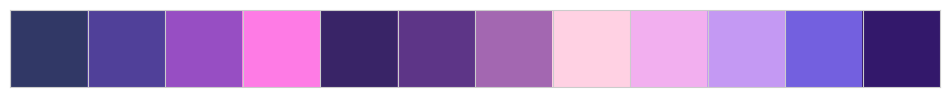

In [69]:
Colors_Palette = ["#313866", "#504099", "#974EC3", "#FE7BE5", "#392467", "#5D3587", "#A367B1", "#FFD1E3", "#F2AFEF", "#C499F3", "#7360DF", "#33186B" ]

clr_palette = sns.color_palette()
sns.palplot(sns.color_palette(Colors_Palette))

plt.show()

Univariate Analysis

In [70]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'yoe', 'num_jobs', 'growth', 'ctc_yoe_ratio',
       'mean_ctc_exp', 'class_flag', 'mean_ctc_position', 'designation_flag',
       'mean_ctc_company', 'tier_flag', 'is_other', 'is_developer', 'is_tech',
       'is_management', 'is_sales', 'is_non_coder', 'ctc_bin'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   company_hash       153443 non-null  object 
 1   email_hash         153443 non-null  object 
 2   orgyear            153443 non-null  int64  
 3   ctc                153443 non-null  int64  
 4   job_position       153443 non-null  object 
 5   ctc_updated_year   153443 non-null  int32  
 6   yoe                153443 non-null  int64  
 7   num_jobs           153443 non-null  int64  
 8   growth             153443 non-null  float64
 9   ctc_yoe_ratio      153443 non-null  float64
 10  mean_ctc_exp       153443 non-null  float64
 11  class_flag         153443 non-null  int64  
 12  mean_ctc_position  153443 non-null  float64
 13  designation_flag   153443 non-null  int64  
 14  mean_ctc_company   153443 non-null  float64
 15  tier_flag          153443 non-null  int64  
 16  is

In [72]:
def get_top_20_value_records(data, feature_name):
    # Get value counts sorted in descending order and get the top 20
    top_20_values = data[feature_name].value_counts().head(20).index

    # Filter the records where the feature value is one of the top 20
    return data[data[feature_name].isin(top_20_values)]


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='count', ylabel='job_position'>

Text(0.5, 1.0, 'Top 20 Job Positions')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Job Position')

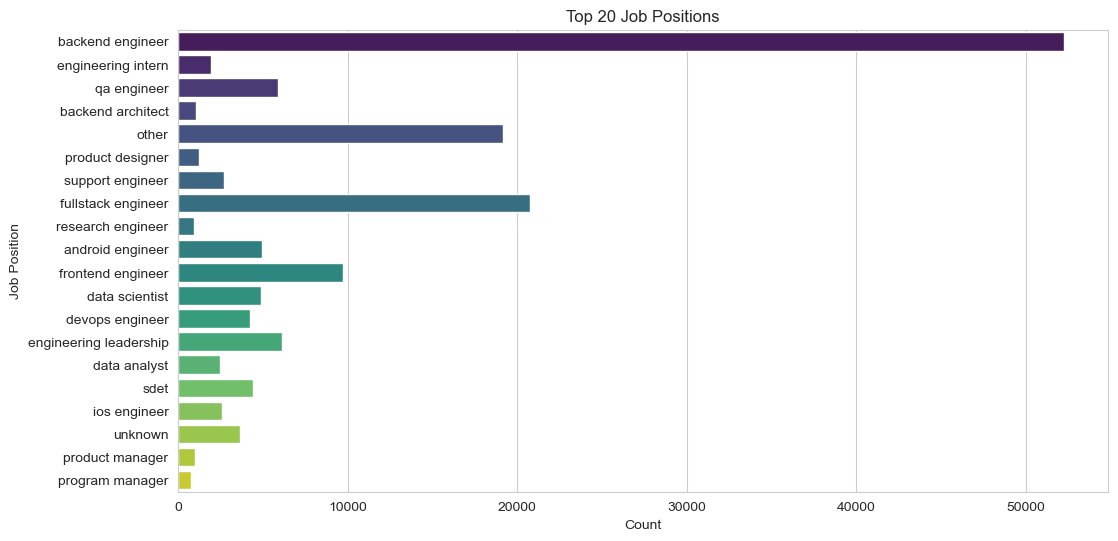

In [73]:
# Get the top 20 records for 'job_position'
top_20_job_positions = get_top_20_value_records(df_FE, 'job_position')

# Count plot for 'job_position'

plt.figure(figsize=(12, 6))
sns.countplot(y='job_position', data=top_20_job_positions, palette='viridis')
plt.title('Top 20 Job Positions')
plt.xlabel('Count')
plt.ylabel('Job Position')
plt.show()

 most the candidates belong to web developement domain

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='count', ylabel='company_hash'>

Text(0.5, 1.0, 'Top 20 Companies')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Company Hash')

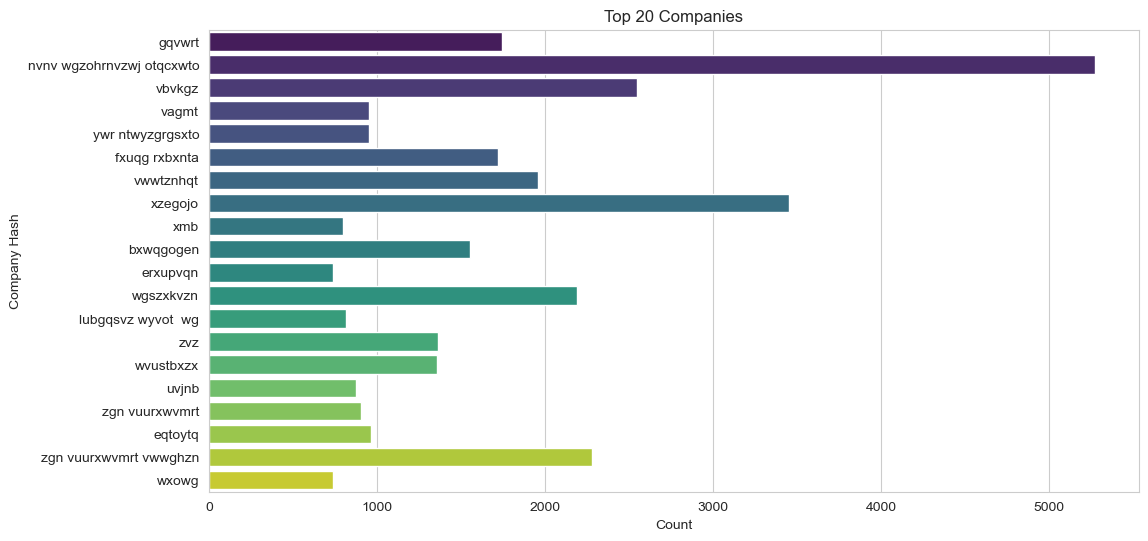

In [74]:
# Get the top 20 records for 'company_hash'
top_20_companies = get_top_20_value_records(df_FE, 'company_hash')

# Count plot for 'company_hash'

plt.figure(figsize=(12, 6))
sns.countplot(y='company_hash', data=top_20_companies, palette='viridis')
plt.title('Top 20 Companies')
plt.xlabel('Count')
plt.ylabel('Company Hash')
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='count', ylabel='ctc_bin'>

Text(0.5, 1.0, 'Top 20 CTC Bins')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'CTC Bin')

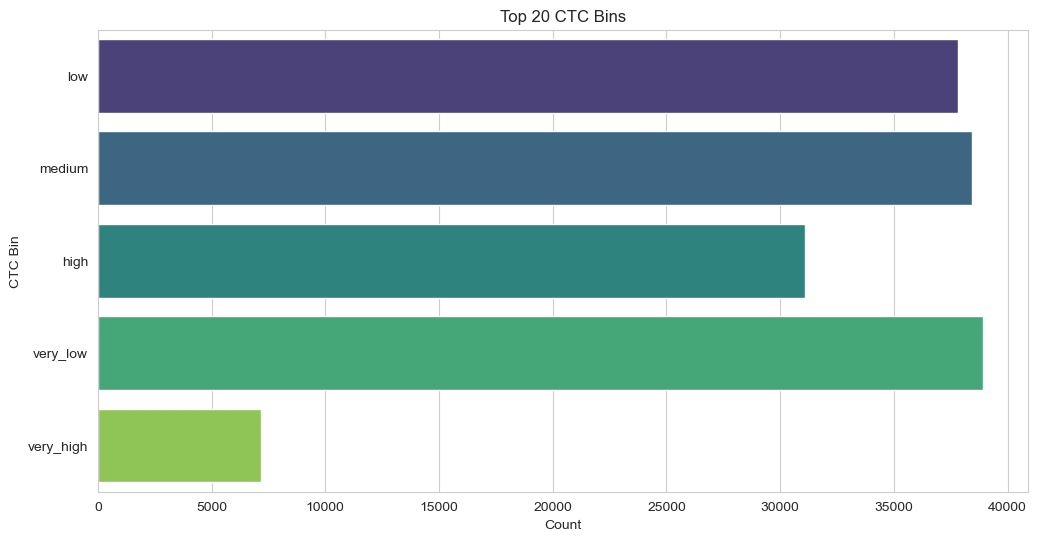

In [75]:
# Get the top 20 records for 'ctc_bin'
top_20_ctc_bins = get_top_20_value_records(df_FE, 'ctc_bin')

# Count plot for 'ctc_bin'

plt.figure(figsize=(12, 6))
sns.countplot(y='ctc_bin', data=top_20_ctc_bins, palette='viridis')
plt.title('Top 20 CTC Bins')
plt.xlabel('Count')
plt.ylabel('CTC Bin')
plt.show()

<Figure size 1800x400 with 0 Axes>

Text(0.5, 0.98, 'orgyear')

<Axes: >

<Axes: xlabel='orgyear'>

Text(0.5, 1.0, 'Boxplot of orgyear')

<Axes: >

<Axes: xlabel='orgyear', ylabel='Count'>

Text(0.5, 1.0, 'Distplot of orgyear')

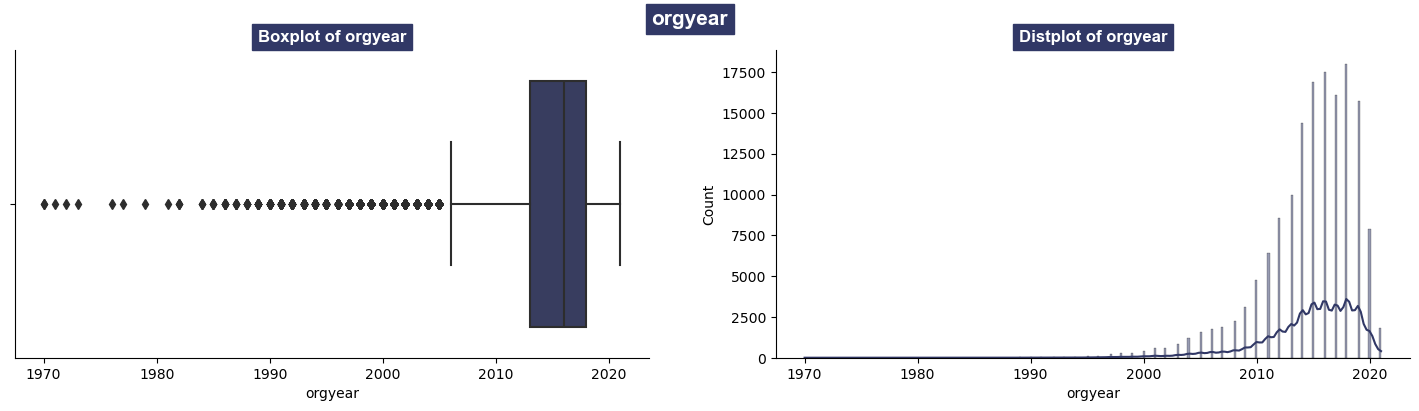

<Figure size 1800x400 with 0 Axes>

Text(0.5, 0.98, 'ctc_updated_year')

<Axes: >

<Axes: xlabel='ctc_updated_year'>

Text(0.5, 1.0, 'Boxplot of ctc_updated_year')

<Axes: >

<Axes: xlabel='ctc_updated_year', ylabel='Count'>

Text(0.5, 1.0, 'Distplot of ctc_updated_year')

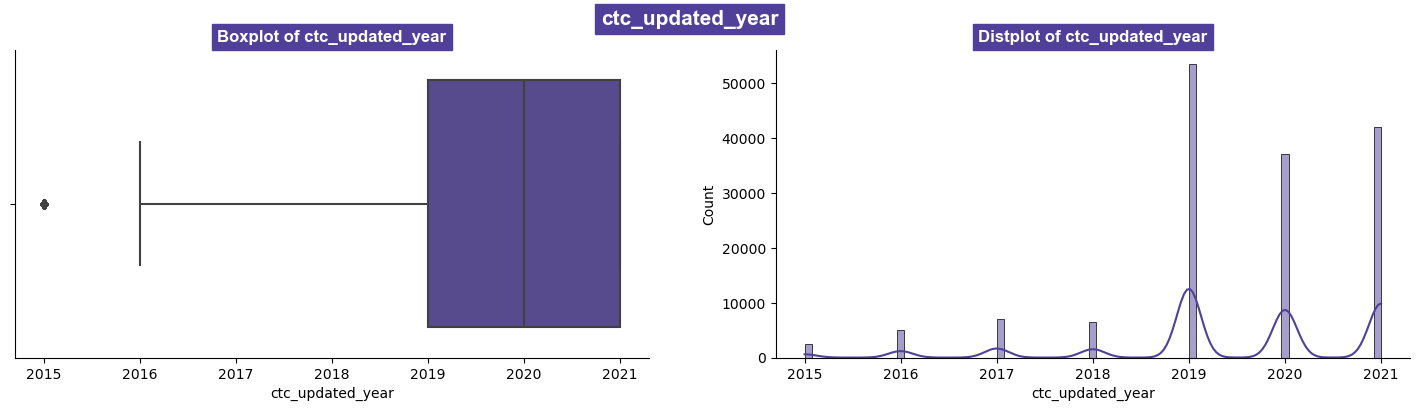

<Figure size 1800x400 with 0 Axes>

Text(0.5, 0.98, 'yoe')

<Axes: >

<Axes: xlabel='yoe'>

Text(0.5, 1.0, 'Boxplot of yoe')

<Axes: >

<Axes: xlabel='yoe', ylabel='Count'>

Text(0.5, 1.0, 'Distplot of yoe')

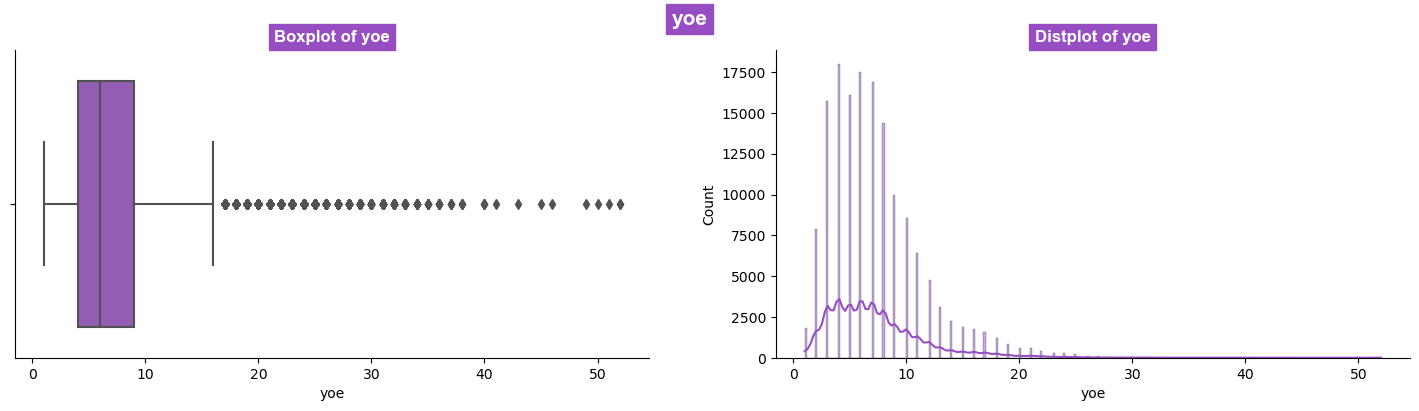

In [76]:
# Boxplot and Distplot for Selected Columns

# Columns to include in the plots
selected_columns = ['orgyear', 'ctc_updated_year', 'yoe']

# Set plot styles
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

# Loop through the selected columns and create boxplots and distplots
for _, col in enumerate(selected_columns):
    plt.figure(figsize=(18, 4))
    plt.suptitle(f'{col}', fontsize=15, fontfamily='Arial', fontweight='bold', backgroundcolor=Colors_Palette[_], color='w')
    
    # Boxplot
    plt.subplot(121)
    sns.boxplot(x=df[col], color=Colors_Palette[_])
    plt.title(f'Boxplot of {col}', fontsize=12, fontfamily='Arial', fontweight='bold', backgroundcolor=Colors_Palette[_], color='w')
    
    # Distplot
    plt.subplot(122)
    sns.histplot(x=df[col], kde=True, color=Colors_Palette[_])
    plt.title(f'Distplot of {col}', fontsize=12, fontfamily='Arial', fontweight='bold', backgroundcolor=Colors_Palette[_], color='w')
    
    sns.despine()
    plt.show()



Insights

The majority of candidates have less than 10 years of experience.
Most CTC updates occurred between 2019 and 2021.
A significant number of candidates joined after 2010.

In [77]:
import pandas as pd

# Filter rows where 'job_position' contains 'intern' or 'trainee', case insensitive
filtered_df = df[df['job_position'].str.contains('intern|trainee', case=False, na=False)]

# Select distinct 'job_position' and 'ctc' and sort by 'ctc' in descending order
distinct_sorted_df = filtered_df[['job_position', 'ctc']].drop_duplicates().sort_values(by='ctc', ascending=False)

# Limit the result to the top 10 rows
top_10_df = distinct_sorted_df.head(10)

# Display the result
print(top_10_df)


              job_position        ctc
33304   engineering intern  200000000
94233   engineering intern  155000000
9907    engineering intern  100000000
139597  engineering intern   80000000
89184   engineering intern   20000000
36711   engineering intern   19700000
31222   engineering intern   14100000
25934   engineering intern   12000000
36423   engineering intern   11500000
85602      security intern   11000000


Job Position like **intern** have Very High CTC which is not Possible.

In [78]:
df["ctc"].quantile(0.95), df["ctc"].quantile(0.05)

(4000000.0, 200000.0)

In [79]:
# Filter the DataFrame to retain rows where 'ctc' is within the 5th and 95th percentiles
ctc_filtered_df = df[(df['ctc'] < df['ctc'].quantile(0.95)) & (df['ctc'] > df['ctc'].quantile(0.05))]


In [80]:
# Mean and Median of CTC for the Filtered Data
mean_ctc = ctc_filtered_df['ctc'].mean()    
median_ctc = ctc_filtered_df['ctc'].median()

# Display the results
print(f"Mean CTC: {mean_ctc:.2f}")
print(f"Median CTC: {median_ctc:.2f}")

Mean CTC: 1215967.07
Median CTC: 1000000.00


Mean Salary is 12 Lakhs

Median Salary is 10 Lakhs

<Figure size 1000x1200 with 0 Axes>

Text(0.5, 0.98, 'Distribution of CTC')

<Axes: >

<Axes: xlabel='ctc'>

Text(0.5, 1.0, 'Boxplot of CTC')

<Axes: >

<Axes: xlabel='ctc', ylabel='Count'>

Text(0.5, 1.0, 'Histplot of CTC')

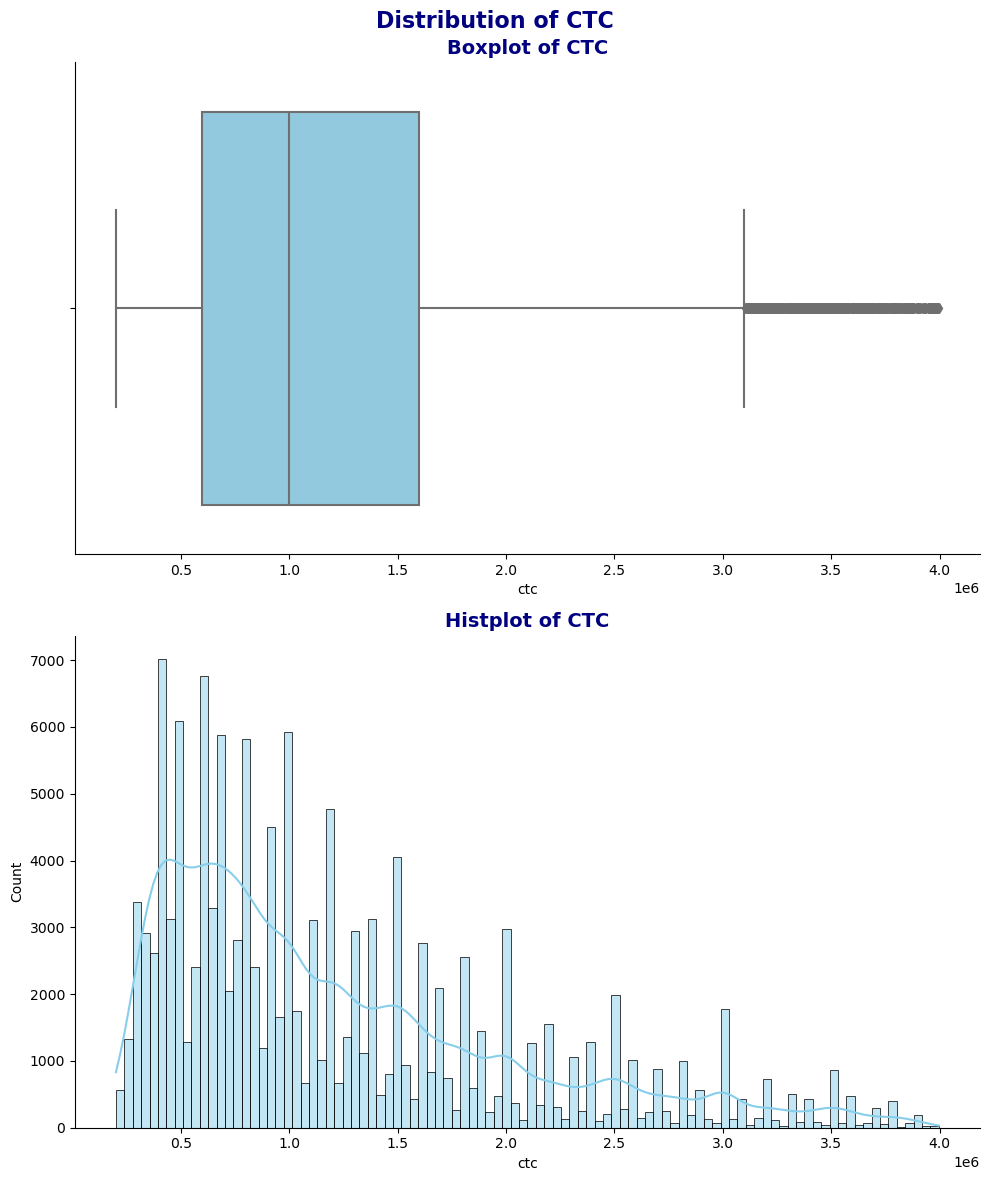

In [81]:
# Box Plot & Histplot for 'ctc' after filtering

plt.figure(figsize=(10, 12))
plt.suptitle('Distribution of CTC', fontsize=16, fontweight='bold', color='navy')

# Boxplot
plt.subplot(211)
sns.boxplot(x=ctc_filtered_df['ctc'], color='skyblue')
plt.title('Boxplot of CTC', fontsize=14, fontweight='bold', color='navy')

# Histplot
plt.subplot(212)
sns.histplot(x=ctc_filtered_df['ctc'], kde=True, color='skyblue')
plt.title('Histplot of CTC', fontsize=14, fontweight='bold', color='navy')

sns.despine()
plt.tight_layout()
plt.show()

Backend Architect has the Highest Average CTC

Support Engineer has Lowest Average CTC

Bi Variate 

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='job_position'>

Text(0.5, 1.0, 'Average CTC for Top 20 Job Positions')

Text(0, 0.5, 'Average CTC')

Text(0.5, 0, 'Job Position')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'support engineer'),
  Text(1, 0, 'data analyst'),
  Text(2, 0, 'qa engineer'),
  Text(3, 0, 'sdet'),
  Text(4, 0, 'android engineer'),
  Text(5, 0, 'frontend engineer'),
  Text(6, 0, 'database administrator'),
  Text(7, 0, 'unknown'),
  Text(8, 0, 'engineering intern'),
  Text(9, 0, 'ios engineer'),
  Text(10, 0, 'fullstack engineer'),
  Text(11, 0, 'devops engineer'),
  Text(12, 0, 'product designer'),
  Text(13, 0, 'research engineer'),
  Text(14, 0, 'backend engineer'),
  Text(15, 0, 'data scientist'),
  Text(16, 0, 'product manager'),
  Text(17, 0, 'program manager'),
  Text(18, 0, 'engineering leadership'),
  Text(19, 0, 'backend architect')])

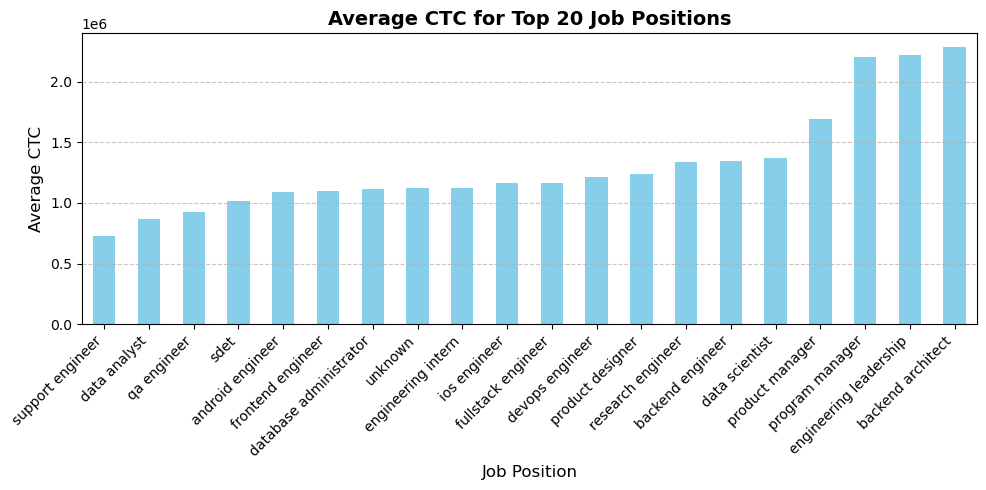

In [82]:
# CTC vs Job Position

# Filter out 'other' job positions and calculate the average CTC for each job position
job_position_ctc_summary = (
    ctc_filtered_df[ctc_filtered_df['job_position'] != 'other']  # Exclude 'other' job positions
    .groupby('job_position', as_index=False)  # Group by 'job_position'
    .agg(avg_ctc=('ctc', 'mean'), count=('ctc', 'count'))  # Calculate average CTC and count
)

# Select the top 20 job positions by count
top_20_positions_ctc = (
    job_position_ctc_summary
    .sort_values(by='count', ascending=False)  # Sort by count in descending order
    .head(20)  # Take the top 20
)

# Sort by average CTC for plotting
top_20_positions_ctc_sorted = top_20_positions_ctc.sort_values(by='avg_ctc')

# Set 'job_position' as the index for better visualization
top_20_positions_ctc_sorted.set_index('job_position', inplace=True)

# Plot a bar chart of the average CTC for the top 20 job positions
plt.figure(figsize=(10, 5))
top_20_positions_ctc_sorted['avg_ctc'].plot(kind='bar', color='skyblue')
plt.title('Average CTC for Top 20 Job Positions', fontsize=14, fontweight='bold')
plt.ylabel('Average CTC', fontsize=12)
plt.xlabel('Job Position', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='yoe', ylabel='ctc'>

Text(0.5, 1.0, 'CTC vs YOE (Bivariate Analysis)')

Text(0.5, 0, 'Years of Experience (YOE)')

Text(0, 0.5, 'CTC (Cost to Company)')

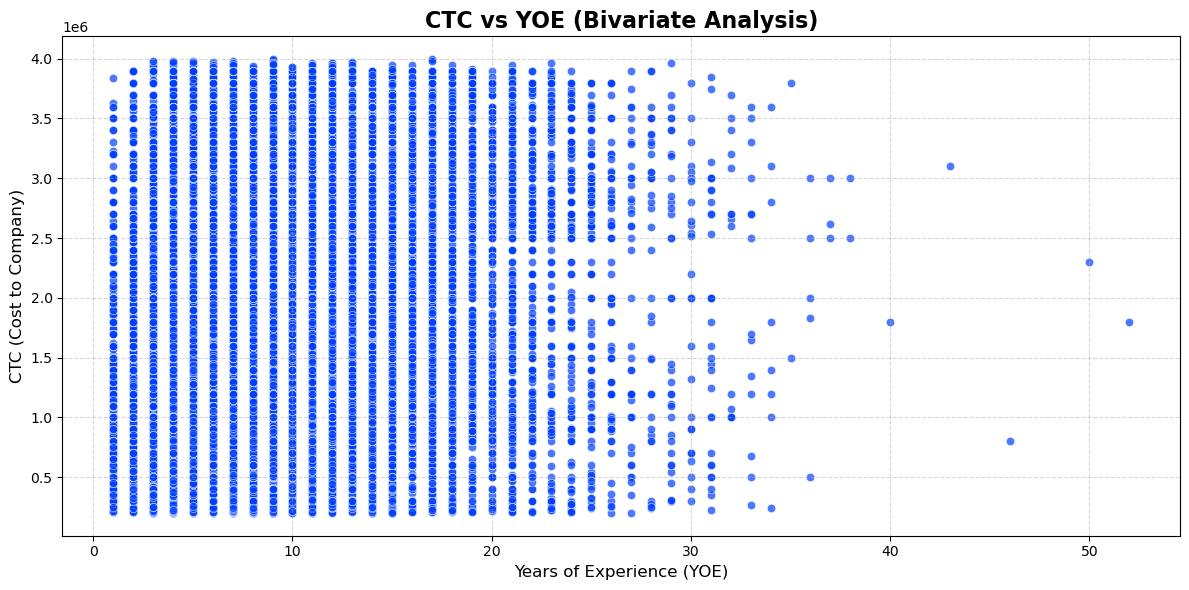

In [83]:
# CTC vs Years of Experience

# Scatter Plot for CTC vs YOE
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=ctc_filtered_df,
    x='yoe',  # Years of Experience
    y='ctc',  # CTC
    palette='viridis',  # Color palette
    alpha=0.7  # Transparency for overlapping points
)

# Add titles and labels
plt.title('CTC vs YOE (Bivariate Analysis)', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience (YOE)', fontsize=12)
plt.ylabel('CTC (Cost to Company)', fontsize=12)


# Add grid for better visualization
plt.grid(axis='both', linestyle='--', alpha=0.5)

# Improve layout
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='count', ylabel='company_hash'>

Text(0.5, 1.0, 'Top 10 Companies with Tier 1 Candidates')

Text(0.5, 0, 'Number of Tier 1 Candidates')

Text(0, 0.5, 'Company Hash')

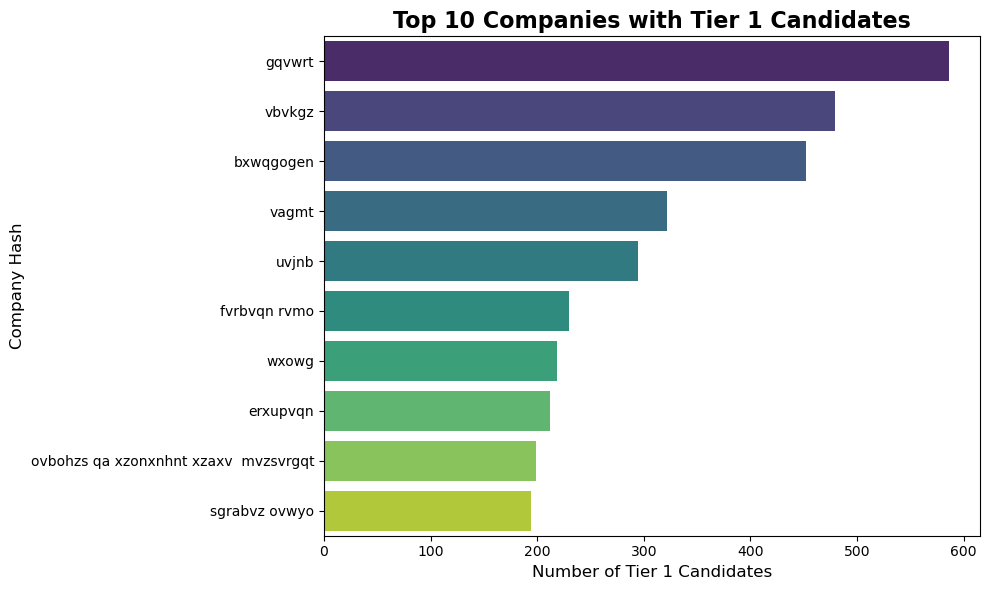

In [84]:
# Filtering for Tier 1 candidates and grouping by company_hash
top_tier1_companies = (
    df[df['tier_flag'] == 1]
    .groupby('company_hash')
    .size()  # Counting occurrences
    .reset_index(name='count')  # Renaming the count column
    .sort_values(by='count', ascending=False)  # Sorting by count
    .head(10)  # Selecting the top 10 companies
)

# Plotting a count plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_tier1_companies,
    x='count',
    y='company_hash',
    palette='viridis'
)

# Adding titles and labels
plt.title('Top 10 Companies with Tier 1 Candidates', fontsize=16, fontweight='bold')
plt.xlabel('Number of Tier 1 Candidates', fontsize=12)
plt.ylabel('Company Hash', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


Company 'gqvwrt' has close to 600 Tier 1 Candidates

In [85]:
ctc_filtered_df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'yoe', 'num_jobs', 'growth', 'ctc_yoe_ratio',
       'mean_ctc_exp', 'class_flag', 'mean_ctc_position', 'designation_flag',
       'mean_ctc_company', 'tier_flag', 'is_other', 'is_developer', 'is_tech',
       'is_management', 'is_sales', 'is_non_coder', 'ctc_bin'],
      dtype='object')

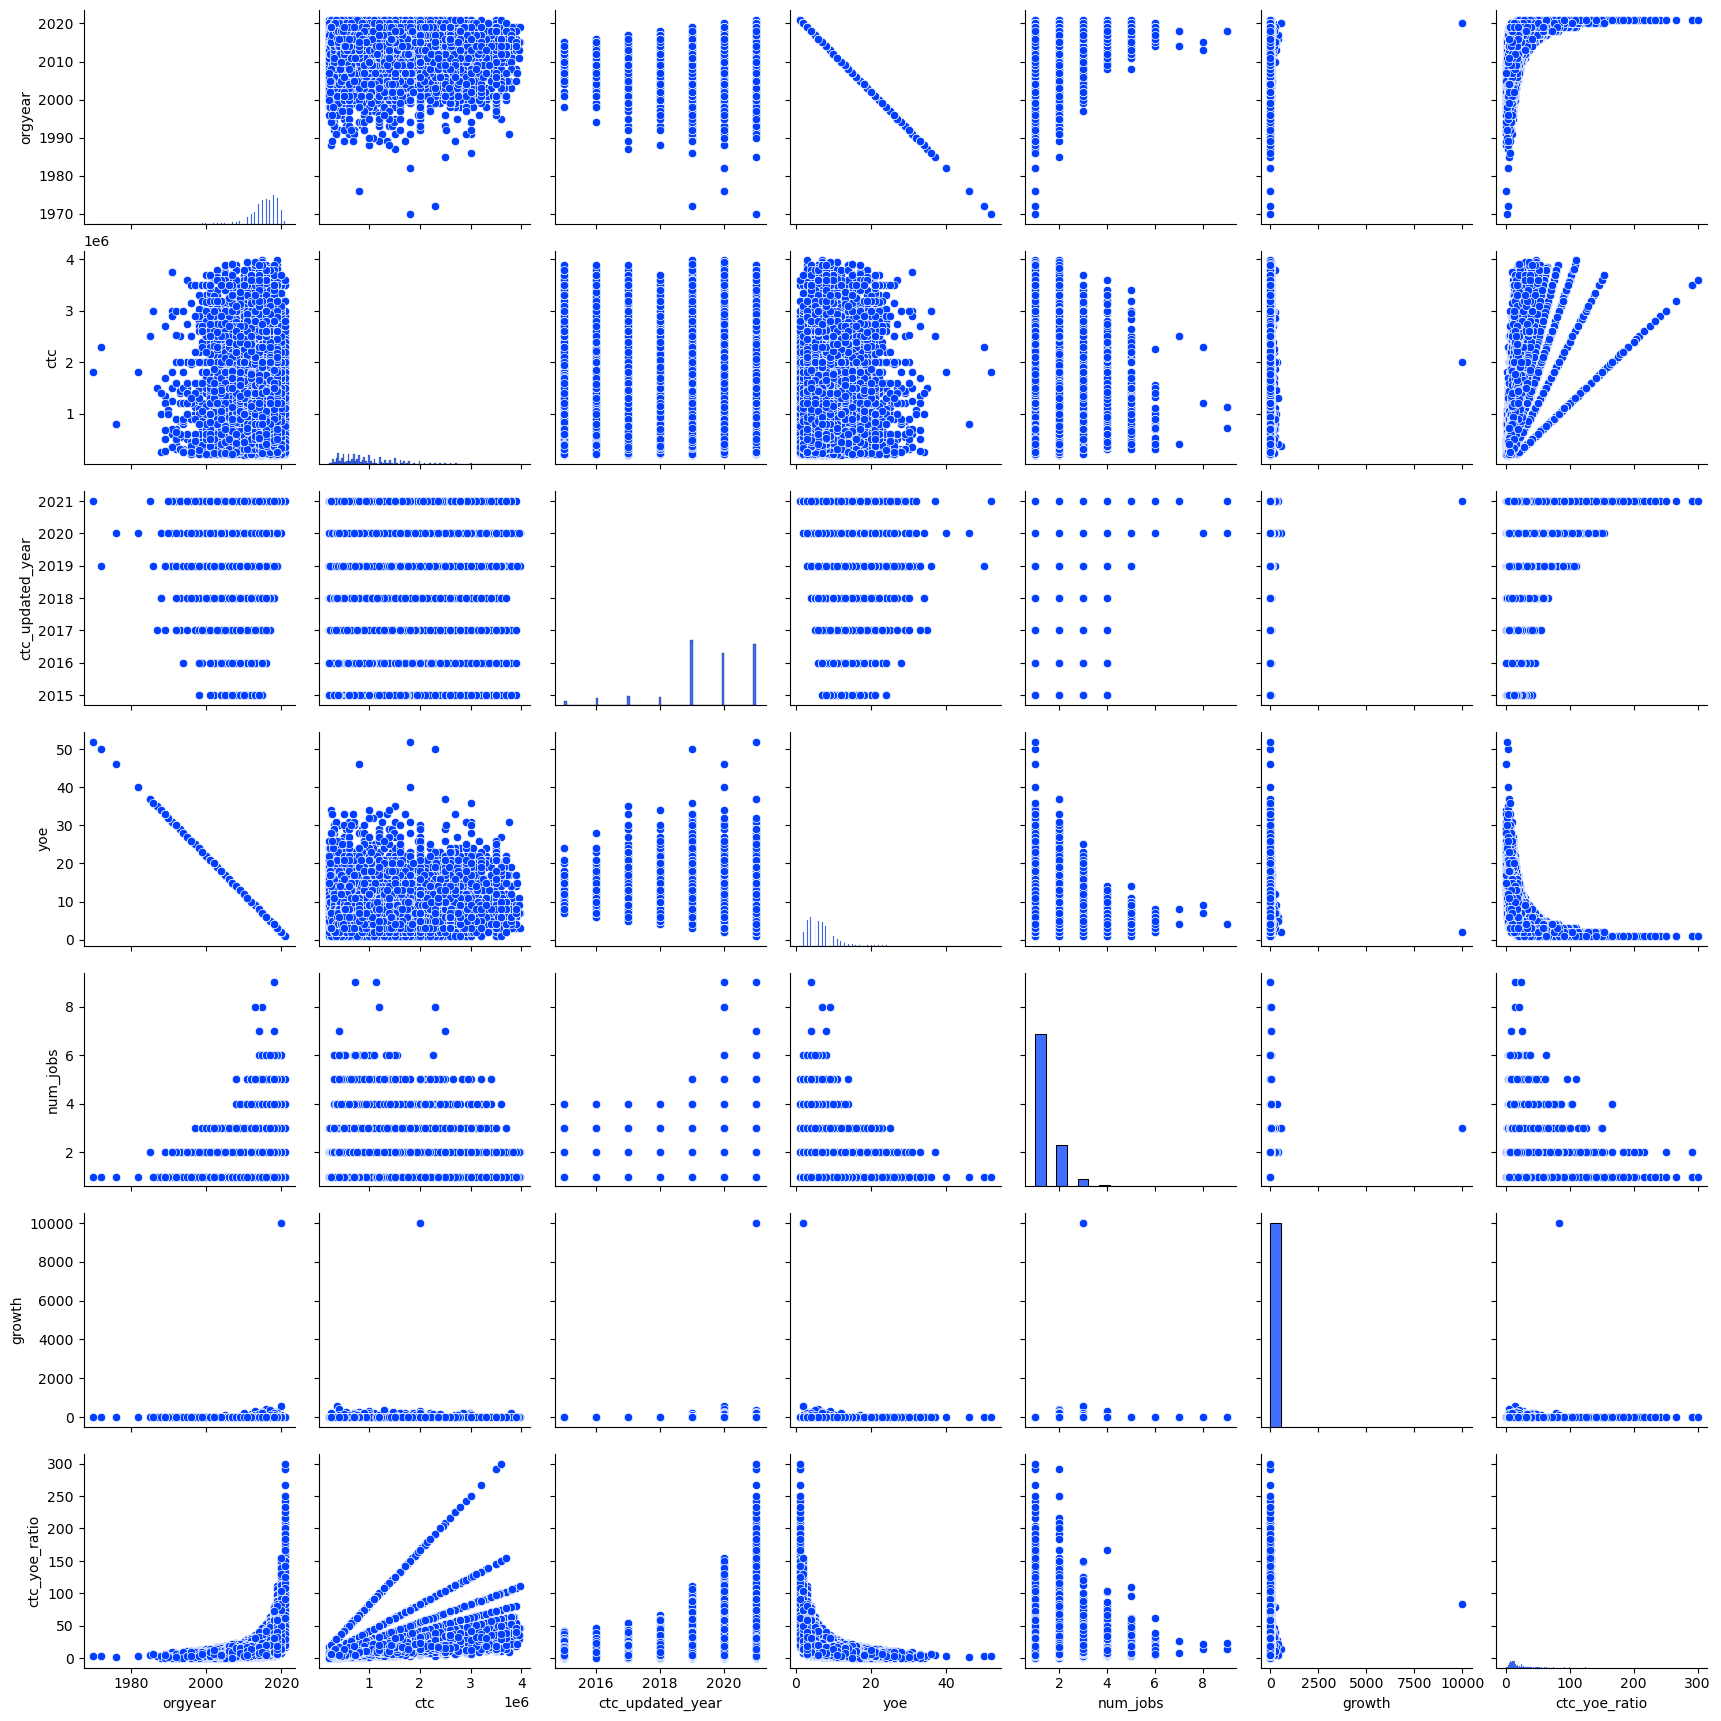

In [86]:
# Selecting relevant columns and filtering for Tier 3 candidates
cols = [
    'orgyear',
    'ctc',
    'ctc_updated_year',
    'yoe',
    'num_jobs',
    'growth',
    'ctc_yoe_ratio',
]

# Filtering the DataFrame for Tier 3 candidates
tier3_filtered_df = ctc_filtered_df[ctc_filtered_df['tier_flag'] == 3]

# Creating the pairplot
sns.pairplot(tier3_filtered_df[cols])

# Displaying the plot
plt.show()


Insights

- The majority of Tier 3 candidates tend to remain with the same company without frequent switches.  
- While most candidates joined their organizations around 2020, there are employees with joining dates extending back to before the 2000s.  
- A significant variance in CTC is observed relative to years of experience, indicating diverse salary structures.  

<Axes: xlabel='ctc_bin'>

Text(0.5, 1.0, 'CTC Bin vs Is_developer')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'CTC Bin')

<Axes: xlabel='ctc_bin'>

Text(0.5, 1.0, 'CTC Bin vs Is_tech')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'CTC Bin')

<Axes: xlabel='ctc_bin'>

Text(0.5, 1.0, 'CTC Bin vs Is_management')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'CTC Bin')

<Axes: xlabel='ctc_bin'>

Text(0.5, 1.0, 'CTC Bin vs Is_sales')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'CTC Bin')

<Axes: xlabel='ctc_bin'>

Text(0.5, 1.0, 'CTC Bin vs Is_non_coder')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'CTC Bin')

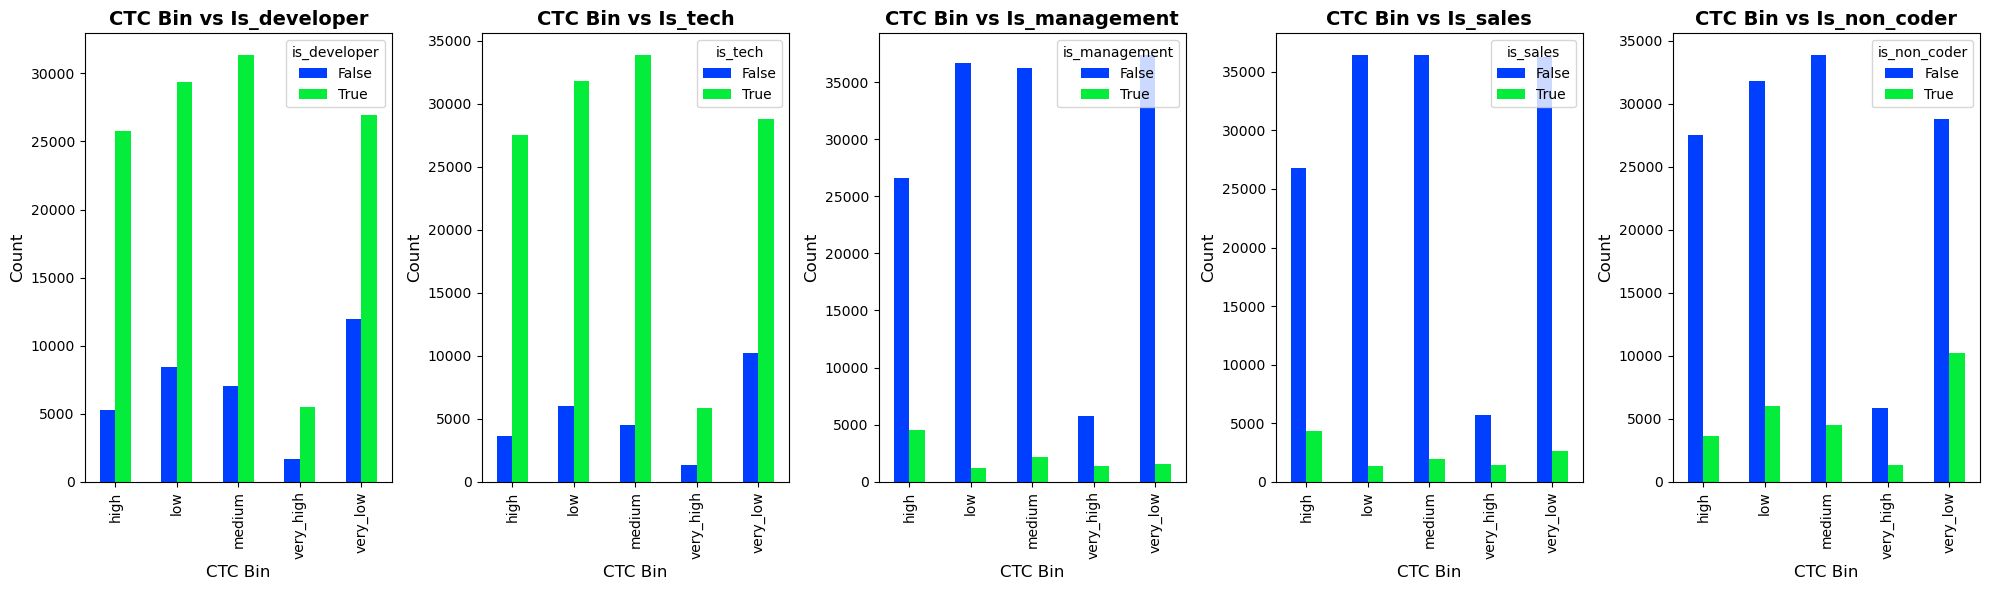

In [87]:
# Define the columns you want to analyze
cols = ['is_developer', 'is_tech', 'is_management', 'is_sales', 'is_non_coder']

# Create subplots for each group comparison
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

# Loop through the columns and create a grouped bar chart for each
for i, col in enumerate(cols):
    # Grouping the data by 'ctc_bin' and the binary column (e.g., 'is_developer', 'is_tech', etc.)
    grouped_data = df.groupby(['ctc_bin', col]).size().reset_index(name='count')
    
    # Pivot the grouped data to create a DataFrame suitable for a bar plot
    pivot_data = grouped_data.pivot(index='ctc_bin', columns=col, values='count').fillna(0)
    
    # Plot the data on the appropriate subplot
    pivot_data.plot(kind='bar', ax=ax[i])
    
    # Set the title for each subplot
    ax[i].set_title(f'CTC Bin vs {col.capitalize()}', fontsize=14, fontweight='bold')
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_xlabel('CTC Bin', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [88]:
num_column = ['orgyear', 'ctc','ctc_updated_year', 'yoe', 'num_jobs', 'growth', 'ctc_yoe_ratio', 'mean_ctc_exp', 'mean_ctc_position', 'mean_ctc_company'] 

In [89]:
df[num_column].corr()

orgyear    ctc  ctc_updated_year    yoe  num_jobs  growth  \
orgyear              1.000 -0.019             0.273 -1.000     0.142   0.006   
ctc                 -0.019  1.000             0.028  0.019    -0.029   0.024   
ctc_updated_year     0.273  0.028             1.000 -0.273     0.267   0.009   
yoe                 -1.000  0.019            -0.273  1.000    -0.142  -0.006   
num_jobs             0.142 -0.029             0.267 -0.142     1.000   0.028   
growth               0.006  0.024             0.009 -0.006     0.028   1.000   
ctc_yoe_ratio        0.069  0.813             0.046 -0.069    -0.018   0.020   
mean_ctc_exp        -0.023  0.812             0.027  0.023    -0.024   0.018   
mean_ctc_position   -0.010  0.708             0.028  0.010    -0.020   0.008   
mean_ctc_company    -0.002  0.616             0.024  0.002    -0.014   0.008   

                   ctc_yoe_ratio  mean_ctc_exp  mean_ctc_position  \
orgyear                    0.069        -0.023             -0.010   
ctc                        0.813         0.812              0.708   
ctc_updated_year           0.046         0.027              0.028   
yoe                       -0.069         0.023              0.010   
num_jobs                  -0.018        -0.024             -0.020   
growth                     0.020         0.018              0.008   
ctc_yoe_ratio              1.000         0.630              0.545   
mean_ctc_exp               0.630         1.000              0.872   
mean_ctc_position          0.545         0.872              1.000   
mean_ctc_company           0.480         0.759              0.870   

                   mean_ctc_company  
orgyear                      -0.002  
ctc                           0.616  
ctc_updated_year              0.024  
yoe                           0.002  
num_jobs                     -0.014  
growth                        0.008  
ctc_yoe_ratio                 0.480  
mean_ctc_exp                  0.759  
mean_ctc_position             0.870  
mean_ctc_company              1.000

<Figure size 2000x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlations - Heatmap')

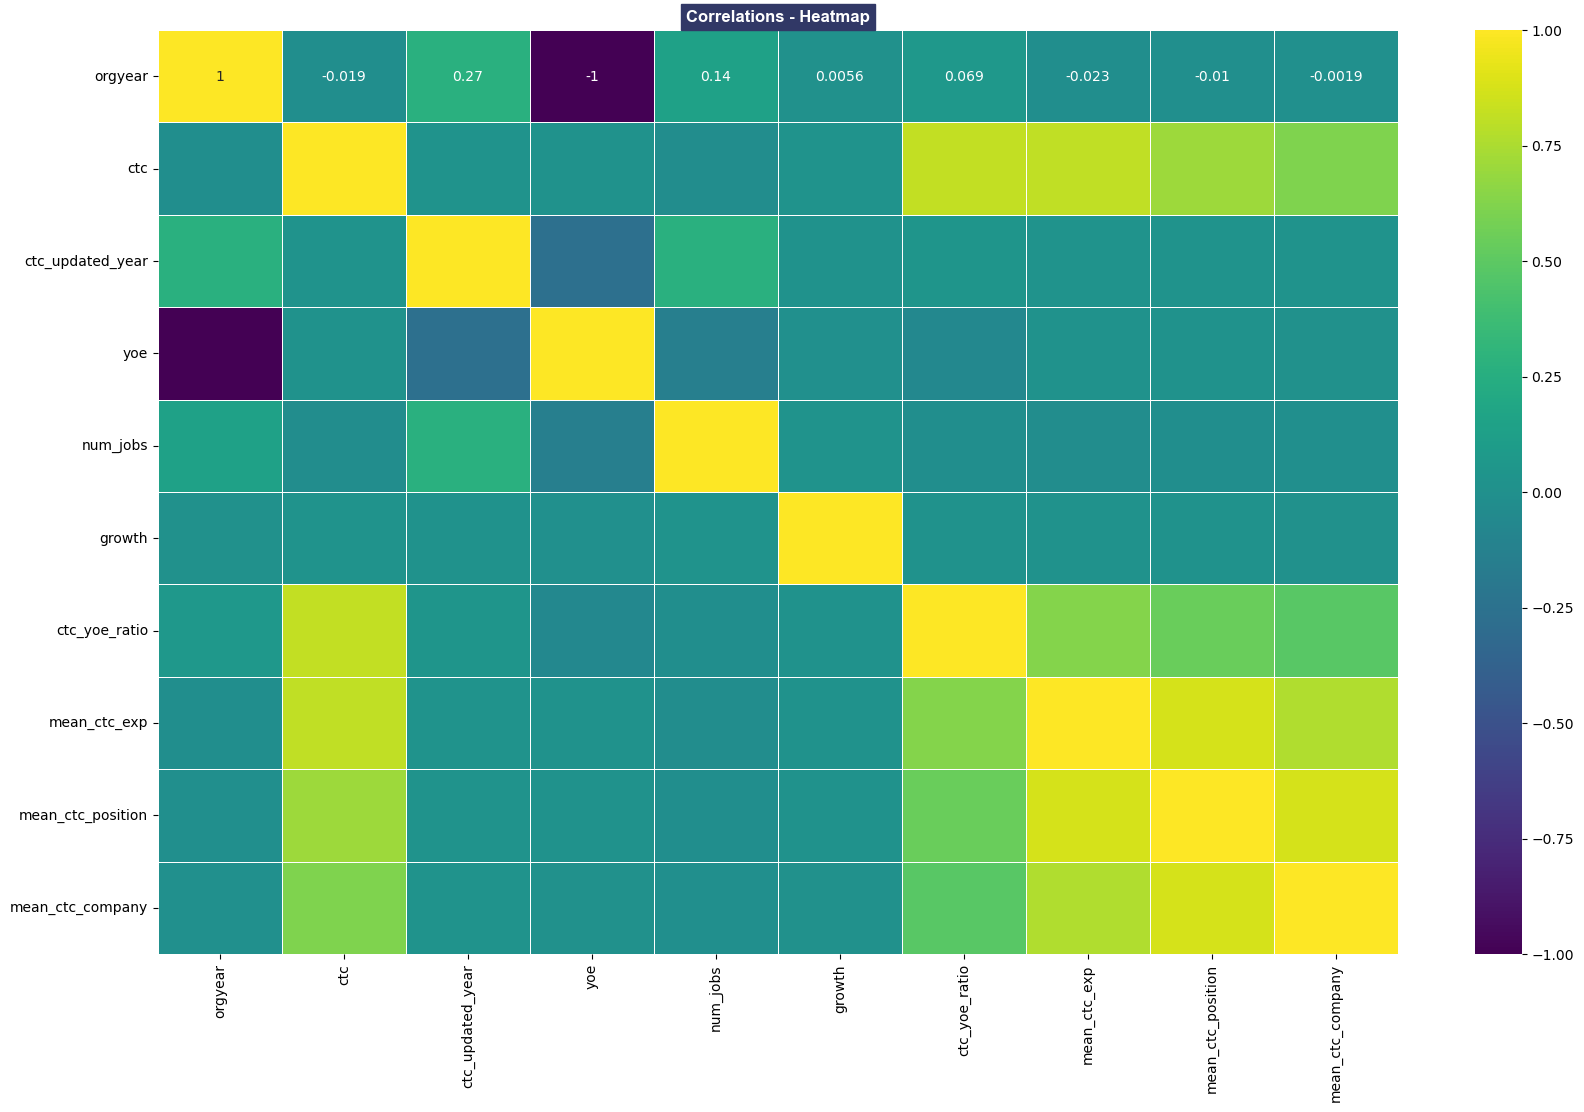

In [90]:
# Correlation Heatmap

plt.figure(figsize=(20,12))

sns.heatmap(df[num_column].corr(), annot=True, cmap='viridis', linewidth=.5, linecolor='w')
plt.title('Correlations - Heatmap',fontsize=12,fontfamily='Arial',fontweight='bold',backgroundcolor=Colors_Palette[0],color='w')
plt.show()

Manual Clustering

Already Performed in Earlier Steps ---> Data Aggregate, Merging the Df, and Flagging

Questionarrie

### Q - Top 10 Employees( Earning more than most of the employees in the Company)

In [91]:
# Filter rows where 'tier_flag' is 1, sort by 'ctc' in descending order, and get the top 10
top_10_tier_1 = df[df['tier_flag'] == 1].sort_values(by='ctc', ascending=False).head(10)
top_10_tier_1

company_hash  \
150985                   obvqnuqxdwgb   
114573                      grd sqghu   
112228                          psxor   
112355      nvnv wgzohrnvzwj otqcxwto   
67703                   otre tburgjta   
112367                      yaew mvzp   
136303                          gnytq   
112489      cxcg bgmxrt xzaxv ucn rna   
135865  qtrxvzwt lxg xzegwgbb rxbxnta   
112619                        stzuvwn   

                                               email_hash  orgyear        ctc  \
150985  5b4bed51797140db4ed52018a979db1e34cee49e27b488...     2015  255555555   
114573  1f8e216b2328e7764f79dbd66deaf008b409870ae992fe...     2019  200000000   
112228  1b9cb9fd05dd794efc20da0f5e873f1afc92767306166b...     2017  200000000   
112355  1ad9ecf5763e6fcc1e7204355c2645e12d3baaf7a7c083...     2015  200000000   
67703   f63e63a8cc3db37c89a49f0498d0731f8c9e2e27943e85...     2015  200000000   
112367  1ad3d8c2b855e9cbe6bb187e8140a07ed8a8b29d275ae0...     2017  200000000   
136303  82b6acf155f320e9e70dcb6d1b6fd33449dc731f4c07bf...     2008  200000000   
112489  1b1a39899354f398255dcbef537ed636bc8ce242fab0ea...     2018  200000000   
135865  81d9854a6797a2ef69f8a9fa358c332d7da3297163507b...     2015  200000000   
112619  1c6bc8b95225bf255f939a64f9d60f84371f16eb621f3a...     2014  200000000   

              job_position  ctc_updated_year  yoe  num_jobs  growth  \
150985  fullstack engineer              2016    7         1   0.000   
114573               other              2020    3         1   0.000   
112228               other              2020    5         1   0.000   
112355        data analyst              2020    7         1   0.000   
67703     android engineer              2020    7         1   0.000   
112367               other              2020    5         1   0.000   
136303               other              2020   14         1   0.000   
112489               other              2020    4         1   0.000   
135865             unknown              2020    7         1   0.000   
112619               other              2020    8         1   0.000   

        ctc_yoe_ratio  ...  designation_flag  mean_ctc_company  tier_flag  \
150985       3042.328  ...                 1      52303111.000          1   
114573       5555.556  ...                 1       5803500.000          1   
112228       3333.333  ...                 1      39772875.000          1   
112355       2380.952  ...                 1       2119574.830          1   
67703        2380.952  ...                 1       8145197.361          1   
112367       3333.333  ...                 1      11884098.344          1   
136303       1190.476  ...                 1      10937976.656          1   
112489       4166.667  ...                 1      33790000.000          1   
135865       2380.952  ...                 1       8577965.517          1   
112619       2083.333  ...                 1       2860794.554          1   

        is_other  is_developer  is_tech  is_management  is_sales  \
150985     False          True     True          False     False   
114573      True         False    False          False     False   
112228      True         False    False          False     False   
112355     False         False     True          False     False   
67703      False          True     True          False     False   
112367      True         False    False          False     False   
136303      True         False    False          False     False   
112489      True         False    False          False     False   
135865      True         False    False          False     False   
112619      True         False    False          False     False   

        is_non_coder    ctc_bin  
150985         False  very_high  
114573          True  very_high  
112228          True  very_high  
112355         False  very_high  
67703          False  very_high  
112367          True  very_high  
136303          True  very_high  
112489          True  very_hig

### Q - Top 10 employees of Data Science in each Company earning more than their peers - Class 1

In [92]:
# Filter rows where 'job_position' starts with 'data' and 'class_flag' is 1, 
# sort by 'ctc' in descending order, and get the top 10
filtered_data = df[df['job_position'].str.startswith('data') & (df['class_flag'] == 1)]
top_10_DS = filtered_data.sort_values(by='ctc', ascending=False).head(10)
top_10_DS

company_hash  \
145840   nvnv wgzohrnvzwj otqcxwto   
72275   ytfrtnn uvwpvqa tzntquqxot   
112355   nvnv wgzohrnvzwj otqcxwto   
123241               ntwy bvyxzaqv   
48160                       vbvkgz   
41075                     wgzahtzn   
124098                       gnytq   
139296   nvnv wgzohrnvzwj otqcxwto   
84049    nvnv wgzohrnvzwj otqcxwto   
51040            ytqt ntwyzgrgsxto   

                                               email_hash  orgyear        ctc  \
145840  655da5cd99f1ba4ad249dade5039b914023484fb7f3959...     2017  200000000   
72275   c888824e687a535d1bd2486ae28d67e414b21b09cbee61...     2015  200000000   
112355  1ad9ecf5763e6fcc1e7204355c2645e12d3baaf7a7c083...     2015  200000000   
123241  7a723f5b71698674b79bd2195c3bb58d3fcbf4ddb75a04...     2019  200000000   
48160   95c8bdd3d10f967f6bfb32f280b0b37fbf5db2359918ba...     2016  200000000   
41075   9ce2995b2221fe627e861daea9d0603872cce8cc128390...     2016  200000000   
124098  6d4a5d19e889596252b038ee0409510aec8c0b32007fb9...     2017  200000000   
139296  59316048d113539202325e05af9b66620255ba84eab635...     2015  200000000   
84049   d42cf076c3915454a083788ea22df68a65a294563adfa3...     2012  200000000   
51040   98a90272cbba6e6e9ca94981824f3465f3d34567cb065f...     2015  200000000   

        job_position  ctc_updated_year  yoe  num_jobs  growth  ctc_yoe_ratio  \
145840  data analyst              2020    5         1   0.000       3333.333   
72275   data analyst              2020    7         1   0.000       2380.952   
112355  data analyst              2020    7         1   0.000       2380.952   
123241  data analyst              2021    3         1   0.000       5555.556   
48160   data analyst              2020    6         1   0.000       2777.778   
41075   data analyst              2020    6         1   0.000       2777.778   
124098  data analyst              2020    5         1   0.000       3333.333   
139296  data analyst              2020    7         1   0.000       2380.952   
84049   data analyst              2020   10         1   0.000       1666.667   
51040   data analyst              2020    7         1   0.000       2380.952   

        ...  designation_flag  mean_ctc_company  tier_flag  is_other  \
145840  ...                 1       2119574.830          1     False   
72275   ...                 1       2870132.567          1     False   
112355  ...                 1       2119574.830          1     False   
123241  ...                 1       3916176.700          1     False   
48160   ...                 1       3745454.345          1     False   
41075   ...                 1       4465441.176          1     False   
124098  ...                 1      10937976.656          1     False   
139296  ...                 1       2119574.830          1     False   
84049   ...                 1       2119574.830          1     False   
51040   ...                 1       4884007.797          1     False   

        is_developer  is_tech  is_management  is_sales  is_non_coder  \
145840         False     True          False     False         False   
72275          False     True          False     False         False   
112355         False     True          False     False         False   
123241         False     True          False     False         False   
48160          False     True          False     False         False   
41075          False     True          False     False         False   
124098         False     True          False     False         False   
139296         False     True          False     False         False   
84049          False     True          False     False         False   
51040          False     True          False     False         False   

          ctc_bin  
145840  very_high  
72275   very_high  
112355  very_high  
123241  very_high  
48160   very_high  
41075   very_high  
124098  very_high  
139296  very_high  
84049   very_high  
51040   very_high  

[10 rows x 23 columns]

### Q - Bottom 10 employees of Data Science in each Company earning less than their peers - Class 3


In [93]:
# Filter rows where 'job_position' starts with 'data' and 'class_flag' is 3, 
# sort by 'ctc' in Ascending order, and get the Bottom 10
filtered_data = df[df['job_position'].str.startswith('data') & (df['class_flag'] == 3)]
Bottom_10_DS = filtered_data.sort_values(by='ctc', ascending=True).head(10)
Bottom_10_DS

company_hash  \
102215  nvnv wgzohrnvzwj otqcxwto   
51390                   wgszxkvzn   
4717                      onhatzn   
89200   nvnv wgzohrnvzwj otqcxwto   
99457                  vqxosrgmvr   
61349                      sggsrt   
150728     zgn vuurxwvmrt vwwghzn   
83446                   ahzzyhbmj   
83770                         zvz   
77788                    tqxwoogz   

                                               email_hash  orgyear    ctc  \
102215  3becd3658bc0d426f8867142eb6cbd7e9ca9f43b572794...     2018   3500   
51390   abf69e786daa23f50d3142b653235e2c030b3b180b07d2...     2014   4300   
4717    bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...     2018   6000   
89200   3175d03fd4618eb293d6f5a1d13d42a0c79f68e9acaaa3...     2020   7500   
99457   3675f79c7e05de96ccf189c818b84b487cb1aa3f6b80e8...     2015   8800   
61349   fb64af615420e06d46a1965f59068b34460fb3cbe70541...     2018  10000   
150728  598b129dd60613cd01a43ea7b946a50a1eb781489feb12...     2020  10000   
83446   d32c344816921ae7be310ba7630c6e267703b2fc4e6a6c...     2016  31000   
83770   d277c90e2b97fb51657936b66b68eee2e52bd4d8d98e1d...     2015  46500   
77788   d8b6c25488ee764c6dbd20c56ad8dca794b6347d6448e2...     2017  49000   

                  job_position  ctc_updated_year  yoe  num_jobs  growth  \
102215  database administrator              2019    4         1   0.000   
51390             data analyst              2019    8         1   0.000   
4717            data scientist              2019    4         3   0.000   
89200           data scientist              2020    2         1   0.000   
99457           data scientist              2019    7         1   0.000   
61349           data scientist              2021    4         1   0.000   
150728  database administrator              2021    2         1   0.000   
83446           data scientist              2019    6         1   0.000   
83770           data scientist              2016    7         1   0.000   
77788           data scientist              2017    5         1   0.000   

        ctc_yoe_ratio  ...  designation_flag  mean_ctc_company  tier_flag  \
102215          0.073  ...                 3       2119574.830          3   
51390           0.045  ...                 3       2038290.080          3   
4717            0.125  ...                 3       4140538.866          3   
89200           0.312  ...                 3       2119574.830          3   
99457           0.105  ...                 3        727971.429          3   
61349           0.208  ...                 3       6294079.417          3   
150728          0.417  ...                 3       2945297.317          3   
83446           0.431  ...                 3       1317928.571          3   
83770           0.554  ...                 3       2280907.642          3   
77788           0.817  ...                 3       1845783.115          3   

        is_other  is_developer  is_tech  is_management  is_sales  \
102215     False          True     True           True     False   
51390      False         False     True          False     False   
4717       False         False     True          False     False   
89200      False         False     True          False     False   
99457      False         False     True          False     False   
61349      False         False     True          False     False   
150728     False          True     True           True     False   
83446      False         False     True          False     False   
83770      False         False     True          False     False   
77788      False         False     True          False     False   

        is_non_coder   ctc_bin  
102215         False  very_low  
51390          False  very_low  
4717           False  very_low  
89200          False  very_low  
99457          False  very_low  
61349          False  very_low  
150728         False  very_low  
83446          False  very_low  
83770          False  very_low  
77788       

### Q - Top 10 Employees in Each Company - X Department - having 5/6/7 Years of Experience earning more than their peers - Tier X

In [94]:
# Filter the DataFrame for tier_flag = 1, designation_flag = 1, and yoe between 5 and 7
filtered_df = df[(df['tier_flag'] == 1) & 
                 (df['designation_flag'] == 1) & 
                 (df['yoe'] >= 5) & 
                 (df['yoe'] <= 7)]

# Sort the filtered DataFrame by company_hash and ctc in descending order, 
# and apply the row number logic (group by company_hash and order by ctc desc)
filtered_df['rn'] = filtered_df.sort_values(['company_hash', 'ctc'], ascending=[True, False]) \
    .groupby('company_hash') \
    .cumcount() + 1

# Select top 10 rows for each company (rn <= 10)
top_10_records = filtered_df[filtered_df['rn'] <= 10]

# Sort the final DataFrame by company_hash, job_position, and ctc (desc)
final_df = top_10_records.sort_values(['company_hash', 'job_position', 'ctc'], ascending=[True, True, False])

# Display the final result
final_df


company_hash                                         email_hash  \
88690           1bs  31db7b806a82aac024462d4c97e70eed918bf8c3193b7c...   
138984          1bs  579d9c719cc05b885297256c122585a8f71871f9079c6f...   
42573           1bs  9c02076a74a2b8a64a6e003fa0a2e4115fc717dacb3585...   
99138           1bs  38dfe791fc911da418b67aa989a6aa7f00b8c680c6d4e1...   
72576           1bs  c97fd1612080086b898e440529c86325ae8ddf2e9a0b60...   
...             ...                                                ...   
60073     zxzlvwvqn  e2377e7ee0d53d2e3a45b9687fdc9c08b136b1dc470806...   
5710      zxztrtvuo  303aab779b6daea19317b430f600b0e8543f4c66ca3251...   
10537     zxztrtvuo  234f0f52e89b20231f5685551b865a08a5634189e1ffec...   
21763     zxztrtvuo  16c227291d7c4f151b52599cc15e1ddd6f7e12a694753c...   
98282     zxztrtvuo  3879b9a1e356ed20363fffd6871207eb908b38c864a2db...   

        orgyear       ctc        job_position  ctc_updated_year  yoe  \
88690      2016   3750000    backend engineer              2020    6   
138984     2015   2930000    backend engineer              2019    7   
42573      2016   2320000    backend engineer              2020    6   
99138      2015   2000000    backend engineer              2019    7   
72576      2015   1800000    backend engineer              2019    7   
...         ...       ...                 ...               ...  ...   
60073      2017   2300000  fullstack engineer              2020    5   
5710       2015  11950000    backend engineer              2020    7   
10537      2015   2500000    backend engineer              2021    7   
21763      2015   1780000    backend engineer              2020    7   
98282      2017   1500000  fullstack engineer              2019    5   

        num_jobs  growth  ctc_yoe_ratio  ...  mean_ctc_company  tier_flag  \
88690          1   0.000         52.083  ...       1587021.277          1   
138984         1   0.000         34.881  ...       1587021.277          1   
42573          1   0.000         32.222  ...       1587021.277          1   
99138          1   0.000         23.810  ...       1587021.277          1   
72576          1   0.000         21.429  ...       1587021.277          1   
...          ...     ...            ...  ...               ...        ...   
60073          1   0.000         38.333  ...       1764666.667          1   
5710           2   8.700        142.262  ...       1269962.245          1   
10537          2   0.667         29.762  ...       1269962.245          1   
21763          2   0.271         21.190  ...       1269962.245          1   
98282          1   0.000         25.000  ...       1269962.245          1   

        is_other  is_developer  is_tech  is_management  is_sales  \
88690      False          True     True          False     False   
138984     False          True     True          False     False   
42573      False          True     True          False     False   
99138      False          True     True          False     False   
72576      False          True     True          False     False   
...          ...           ...      ...            ...       ...   
60073      False          True     True          False     False   
5710       False          True     True          False     False   
10537      False          True     True          False     False   
21763      False          True     True          False     False   
98282      False          True     True          False     False   

        is_non_coder    ctc_bin  rn  
88690          False       high   1  
138984         False       high   2  
42573          False       high   3  
99138          False       high   4  
72576          False       high   5  
...              ...        ...  ..  
60073          False       high   5  
5710           False  very_high   1  
10537          False       high   2  
21763          False       high   3  
98282          False     medium   4  

[4899 rows x 24 columns]

### Q - Top 10 Companies (Based on their CTC)

In [95]:
# Group the DataFrame by 'company_hash' and calculate the average of 'ctc' for each company
avg_ctc_df = df.groupby('company_hash')['ctc'].mean().reset_index()

# Sort the DataFrame by 'avg_ctc' in descending order and get the top 10 companies
top_10_avg_ctc = avg_ctc_df.sort_values(by='ctc', ascending=False).head(10)

# Display the result
top_10_avg_ctc


company_hash            ctc
29688               whmxw rgsxwo uqxcvnt rxbxnta 1000150000.000
1189           aveegaxr xzntqzvnxgzvr hzxctqoxnj  250000000.000
14649  ogzv wgrrtst ge ntwyzgrgsjvzzv hzxctqoxnj  200000000.000
25708               vayxxuv ntwyzgrgsxto ucn rna  200000000.000
25038                   uvqp wgbuhntq ojontb xzw  200000000.000
8627        i wgzztin mhoxztoo ogrhnxgzo ucn rna  200000000.000
17103                     oxburjyq ogrhnxgzo rru  200000000.000
4991                           dgq avnv tdwyvzst  200000000.000
592                         anaw tduqtoo rxbxnta  200000000.000
13319                           nvrtzn ouvwt xzw  200000000.000

### Q - Top 2 Positions in Every Company (based on their CTC)

In [96]:
# First, we sort the DataFrame by 'company_hash' and 'ctc' in descending order to simulate the ranking
df_sorted = df.sort_values(by=['company_hash', 'ctc'], ascending=[True, False])

# Then, we group the DataFrame by 'company_hash' and assign a row number (rank) to each 'job_position' within each company
df_sorted['rn'] = df_sorted.groupby('company_hash').cumcount() + 1

# Filter the rows where the row number is less than or equal to 2 (i.e., select top 2 for each company)
top_2_ctc_per_company = df_sorted[df_sorted['rn'] <= 2]

# Select the relevant columns and sort the DataFrame by 'company_hash' and 'ctc' in descending order
result = top_2_ctc_per_company[['company_hash', 'job_position', 'ctc']].sort_values(by=['company_hash', 'ctc'], ascending=[False, False])

# Display the result
result


company_hash        job_position      ctc
84070                           zzgato             unknown   130000
71133     zzb ztdnstz vacxogqj ucn rna  fullstack engineer   600000
133579                              zz               other  1370000
78987                               zz               other   500000
141069     zyvzwt wgzohrnxzs tzsxzttqo   frontend engineer   940000
...                                ...                 ...      ...
96750   05mz exzytvrny uqxcvnt rxbxnta    backend engineer  1100000
59912                       01 ojztqsj   frontend engineer   830000
135778                      01 ojztqsj    android engineer   270000
39426                             0000               other   300000
54190                                0               other   100000

[45032 rows x 3 columns]

# Unsupervised Learning

Label Encoding is Already Done in Feature Engineering Part except the `ctc_bin`

In [97]:
df_Clustering = df.copy()

In [98]:
df.head()

company_hash                                         email_hash  \
0        cvrhtbgbtznhb  298528ce3160cc761e4dc37a07337ee2e0589df251d736...   
1  wgcxvb ntwyzgrgsxto  3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...   
2             ihvrwgbb  6842660273f70e9aa239026ba33bfe82275d6ab0d20124...   
3               gqvwrt  4818edfd67ed8563dde5d083306485d91d19f4f1c95d19...   
4   nyt a t oyvf sqghu  c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7...   

   orgyear      ctc        job_position  ctc_updated_year  yoe  num_jobs  \
0     2018   720000    backend engineer              2020    4         9   
1     2018  1130000  engineering intern              2021    4         9   
2     2017  2400000         qa engineer              2020    5         9   
3     2015  1200000   backend architect              2020    7         8   
4     2013  2300000               other              2020    9         8   

   growth  ctc_yoe_ratio  ...  designation_flag  mean_ctc_company  tier_flag  \
0   0.029         15.000  ...                 3        747619.048          3   
1   0.041         23.542  ...                 2       1223750.000          3   
2   0.200         40.000  ...                 1       2236561.619          1   
3   0.000         14.286  ...                 3       1700962.689          3   
4   0.513         21.296  ...                 3       4401026.176          3   

   is_other  is_developer  is_tech  is_management  is_sales  is_non_coder  \
0     False          True     True          False     False         False   
1     False          True     True          False     False         False   
2     False          True     True          False     False         False   
3     False          True     True          False     False         False   
4      True         False    False          False     False          True   

   ctc_bin  
0      low  
1   medium  
2     high  
3   medium  
4     high  

[5 rows x 23 columns]

In [99]:
# List of columns to drop
columns_to_drop = ["email_hash", "class_flag", "designation_flag", "tier_flag", "company_hash", "is_tech"]

# Check if the columns exist in the DataFrame
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop only the existing columns
df = df.drop(columns=existing_columns)

# Display the updated DataFrame
print(df.head())


   orgyear      ctc        job_position  ctc_updated_year  yoe  num_jobs  \
0     2018   720000    backend engineer              2020    4         9   
1     2018  1130000  engineering intern              2021    4         9   
2     2017  2400000         qa engineer              2020    5         9   
3     2015  1200000   backend architect              2020    7         8   
4     2013  2300000               other              2020    9         8   

   growth  ctc_yoe_ratio  mean_ctc_exp  mean_ctc_position  mean_ctc_company  \
0   0.029         15.000    720000.000         980000.000        747619.048   
1   0.041         23.542   1130000.000        1130000.000       1223750.000   
2   0.200         40.000   1900000.000        1612857.143       2236561.619   
3   0.000         14.286   1200000.000        3269120.000       1700962.689   
4   0.513         21.296   2300000.000        3603825.308       4401026.176   

   is_other  is_developer  is_management  is_sales  is_non_coder ctc

In [100]:
# Define a dictionary for mapping ctc_bin values to corresponding numerical values
ctc_bin_map = {
    "very_high": 5,
    "high": 4,
    "medium": 3,
    "low": 2
}

# Use pandas' map function to map ctc_bin to numerical values, with a default value of 1 for other categories
df['ctc_bin'] = df['ctc_bin'].map(ctc_bin_map).fillna(1).astype(int)

# Display the updated DataFrame
print(df.head())


   orgyear      ctc        job_position  ctc_updated_year  yoe  num_jobs  \
0     2018   720000    backend engineer              2020    4         9   
1     2018  1130000  engineering intern              2021    4         9   
2     2017  2400000         qa engineer              2020    5         9   
3     2015  1200000   backend architect              2020    7         8   
4     2013  2300000               other              2020    9         8   

   growth  ctc_yoe_ratio  mean_ctc_exp  mean_ctc_position  mean_ctc_company  \
0   0.029         15.000    720000.000         980000.000        747619.048   
1   0.041         23.542   1130000.000        1130000.000       1223750.000   
2   0.200         40.000   1900000.000        1612857.143       2236561.619   
3   0.000         14.286   1200000.000        3269120.000       1700962.689   
4   0.513         21.296   2300000.000        3603825.308       4401026.176   

   is_other  is_developer  is_management  is_sales  is_non_coder  ct

In [101]:
# Step 1: Calculate the job position frequency
job_frequency_df = df.groupby("job_position").size().reset_index(name="job_pos_frequency")

# Step 2: Merge the job frequency data back into the original dataframe
df = df.merge(job_frequency_df, on="job_position", how="left")

# Step 3: Drop the original 'job_position' column
df = df.drop(columns=["job_position"])

# Step 4: Rename the 'job_pos_frequency' column to 'job_position'
df = df.rename(columns={"job_pos_frequency": "job_position"})

# Display the resulting dataframe
print(df.head())


   orgyear      ctc  ctc_updated_year  yoe  num_jobs  growth  ctc_yoe_ratio  \
0     2018   720000              2020    4         9   0.029         15.000   
1     2018  1130000              2021    4         9   0.041         23.542   
2     2017  2400000              2020    5         9   0.200         40.000   
3     2015  1200000              2020    7         8   0.000         14.286   
4     2013  2300000              2020    9         8   0.513         21.296   

   mean_ctc_exp  mean_ctc_position  mean_ctc_company  is_other  is_developer  \
0    720000.000         980000.000        747619.048     False          True   
1   1130000.000        1130000.000       1223750.000     False          True   
2   1900000.000        1612857.143       2236561.619     False          True   
3   1200000.000        3269120.000       1700962.689     False          True   
4   2300000.000        3603825.308       4401026.176      True         False   

   is_management  is_sales  is_non_coder  ct

In [102]:
df_enc = df.copy()

In [103]:
# Import StandardScaler from sklearn for standardization
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object, which will scale the features
std_scaler = StandardScaler()

# Fit the StandardScaler to the DataFrame 'df' to calculate the mean and standard deviation
std_scaler.fit(df)

# Transform the data using the fitted scaler
std_df = std_scaler.transform(df)

# Convert the resulting numpy array 'std_df' back into a pandas DataFrame
std_df = pd.DataFrame(std_df, columns=df.columns)

# Display the first 5 rows of the standardized DataFrame
std_df.head()

StandardScaler()

orgyear    ctc  ctc_updated_year    yoe  num_jobs  growth  ctc_yoe_ratio  \
0    0.768 -0.138             0.372 -0.768    14.047  -0.013         -0.089   
1    0.768 -0.106             1.101 -0.768    14.047  -0.013         -0.059   
2    0.534 -0.009             0.372 -0.534    14.047  -0.009         -0.001   
3    0.067 -0.101             0.372 -0.067    12.234  -0.014         -0.091   
4   -0.401 -0.017             0.372  0.401    12.234   0.000         -0.067   

   mean_ctc_exp  mean_ctc_position  mean_ctc_company  is_other  is_developer  \
0        -0.170             -0.166            -0.220    -0.418         0.537   
1        -0.131             -0.150            -0.161    -0.418         0.537   
2        -0.059             -0.098            -0.035    -0.418         0.537   
3        -0.124              0.081            -0.102    -0.418         0.537   
4        -0.021              0.117             0.233     2.395        -1.861   

   is_management  is_sales  is_non_coder  ctc_bin  job_position  
0         -0.275    -0.288        -0.448   -0.451         1.326  
1         -0.275    -0.288        -0.448    0.382        -1.114  
2         -0.275    -0.288        -0.448    1.215        -0.924  
3         -0.275    -0.288        -0.448    0.382        -1.159  
4         -0.275    -0.288         2.230    1.215        -0.280

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   orgyear            153443 non-null  int64  
 1   ctc                153443 non-null  int64  
 2   ctc_updated_year   153443 non-null  int32  
 3   yoe                153443 non-null  int64  
 4   num_jobs           153443 non-null  int64  
 5   growth             153443 non-null  float64
 6   ctc_yoe_ratio      153443 non-null  float64
 7   mean_ctc_exp       153443 non-null  float64
 8   mean_ctc_position  153443 non-null  float64
 9   mean_ctc_company   153443 non-null  float64
 10  is_other           153443 non-null  bool   
 11  is_developer       153443 non-null  bool   
 12  is_management      153443 non-null  bool   
 13  is_sales           153443 non-null  bool   
 14  is_non_coder       153443 non-null  bool   
 15  ctc_bin            153443 non-null  int32  
 16  jo

In [105]:
# Making std_df as df for further processing

DF = std_df.copy()

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Standardized Data')

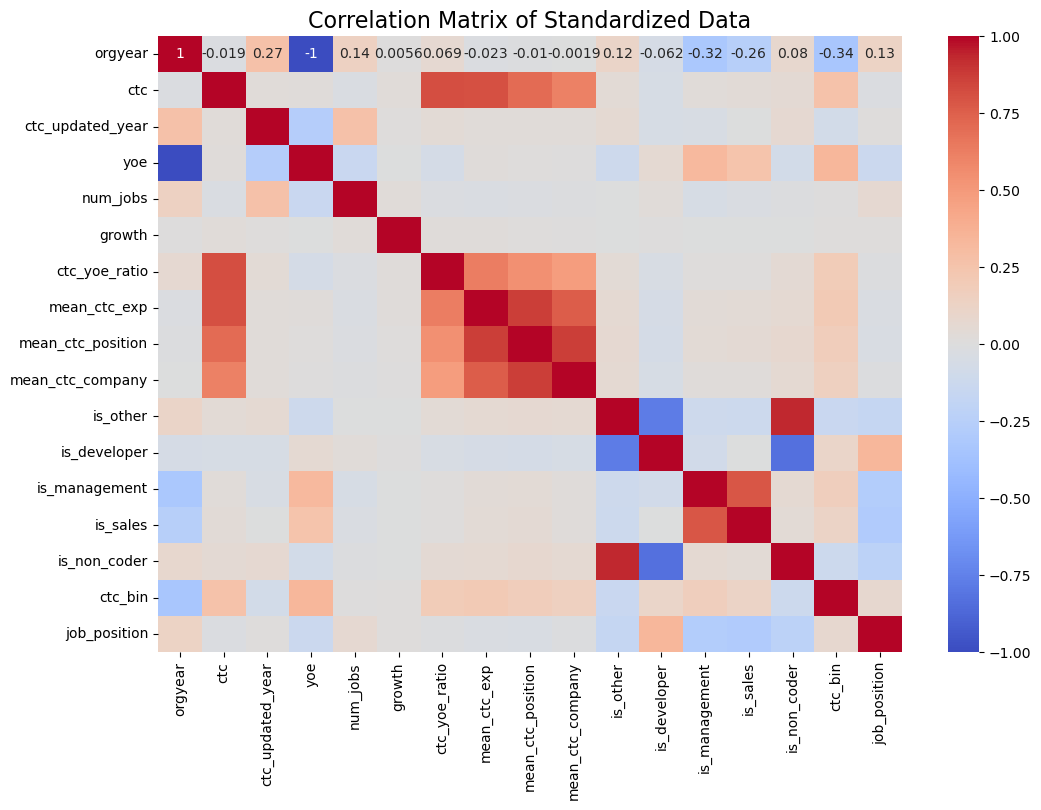

In [108]:
# Heatmap for Correlation Matrix of Standardized Data

plt.figure(figsize=(12, 8))

sns.heatmap(DF.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Standardized Data", fontsize=16)

plt.show()

In [109]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   orgyear            153443 non-null  float64
 1   ctc                153443 non-null  float64
 2   ctc_updated_year   153443 non-null  float64
 3   yoe                153443 non-null  float64
 4   num_jobs           153443 non-null  float64
 5   growth             153443 non-null  float64
 6   ctc_yoe_ratio      153443 non-null  float64
 7   mean_ctc_exp       153443 non-null  float64
 8   mean_ctc_position  153443 non-null  float64
 9   mean_ctc_company   153443 non-null  float64
 10  is_other           153443 non-null  float64
 11  is_developer       153443 non-null  float64
 12  is_management      153443 non-null  float64
 13  is_sales           153443 non-null  float64
 14  is_non_coder       153443 non-null  float64
 15  ctc_bin            153443 non-null  float64
 16  jo

### Hopkins Test for Cluster Tendency Check

In [113]:
def hopkins_statistic(df, sample_size=0.1):
    # Ensure all columns in the DataFrame are numeric
    df_numeric = DF.apply(pd.to_numeric, errors='coerce')

    # Number of rows in the dataframe
    n = df_numeric.shape[0]
    
    # Determine the sample size based on the given proportion
    m = int(sample_size * n)

    # Randomly select indices for sampling
    random_indices = np.random.choice(np.arange(n), size=m, replace=False)
    df_sample = df_numeric.iloc[random_indices]

    # Convert the dataframe to a NumPy array for min/max calculation
    X = df_numeric.to_numpy()

    # Calculate the min and max for each column
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    # Generate random points within the bounds of the data
    X_uniform_random = np.random.uniform(X_min, X_max, (m, X.shape[1]))

    # Fit nearest neighbors model on the data
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    # Calculate the distances for the sampled points and the random points
    u_distances, _ = nbrs.kneighbors(df_sample)
    u_distances = u_distances.sum()
    
    w_distances, _ = nbrs.kneighbors(X_uniform_random)
    w_distances = w_distances.sum()

    # Compute the Hopkins statistic
    hopkins_stat = w_distances / (u_distances + w_distances)

    return hopkins_stat


In [115]:
hopkins_stat = hopkins_statistic(DF, sample_size=0.1)
print("Hopkins Statistic:", hopkins_stat)

Hopkins Statistic: 0.9999999998572753


A Hopkins Statistic value of 1.0 typically indicates that the data points are highly clustered or non-random. In other words, the points are very close to each other in space, and the distribution is not random. This suggests that the dataset might contain distinct clusters or groups within it.

### K-Means Clustering

In [200]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   orgyear            153443 non-null  float64
 1   ctc                153443 non-null  float64
 2   ctc_updated_year   153443 non-null  float64
 3   yoe                153443 non-null  float64
 4   num_jobs           153443 non-null  float64
 5   growth             153443 non-null  float64
 6   ctc_yoe_ratio      153443 non-null  float64
 7   mean_ctc_exp       153443 non-null  float64
 8   mean_ctc_position  153443 non-null  float64
 9   mean_ctc_company   153443 non-null  float64
 10  is_other           153443 non-null  float64
 11  is_developer       153443 non-null  float64
 12  is_management      153443 non-null  float64
 13  is_sales           153443 non-null  float64
 14  is_non_coder       153443 non-null  float64
 15  ctc_bin            153443 non-null  float64
 16  jo

<Figure size 800x500 with 0 Axes>

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Inertia')

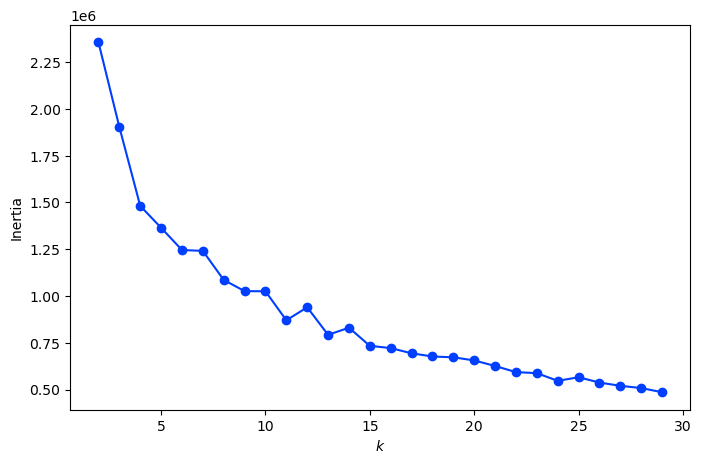

In [117]:
import os
from sklearn.cluster import KMeans

# If needed, you can set the number of threads to avoid parallelism issues
os.environ["OMP_NUM_THREADS"] = "1"  # Disabling multi-threading

# Assuming df is your DataFrame and is numeric
df_numeric = DF.select_dtypes(include=['float64', 'int64'])

# Fit KMeans models for each value of k and store the models in a list
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_numeric) for k in range(2, 30, 1)]

# Extract the inertia values (within-cluster sum of squared distances) from each model
inertias = [model.inertia_ for model in kmeans_per_k]

# Plot the inertia for each k value to visualize the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 30, 1), inertias, "-o")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()


We will Use K = 5 for K - Means Clustering due to the presence of Elbow

### Using PCA to reduce the Dimensions

In [118]:
# Fit PCA and calculate the cumulative explained variance ratio
pca = PCA()
pca.fit(df_numeric)
pca_explained_variance = pca.explained_variance_ratio_.cumsum()

# Output the cumulative explained variance
pca_explained_variance


PCA()

array([0.23337373, 0.40859196, 0.56448411, 0.6534014 , 0.71934577,
       0.77789144, 0.82638646, 0.8698445 , 0.91103796, 0.94638182,
       0.96183536, 0.97527273, 0.98496568, 0.99222017, 0.99719639,
       1.        , 1.        ])

<Axes: >

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Explained Variance')

([<matplotlib.axis.XTick at 0x2575e806590>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

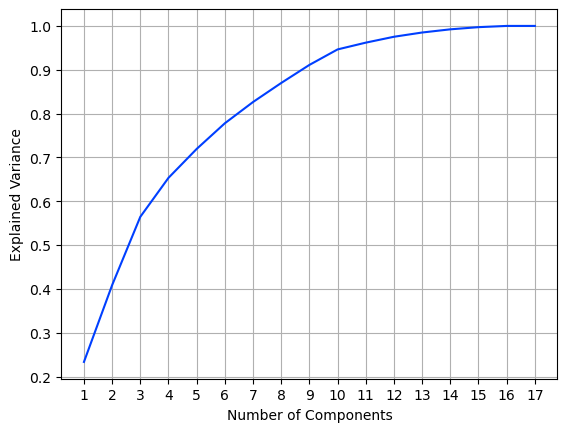

In [119]:
# Create a line plot for the cumulative explained variance
sns.lineplot(x=range(1, len(pca_explained_variance) + 1), y=pca_explained_variance)

# Label the x-axis and y-axis
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")

# Set the x-ticks to match the number of components
plt.xticks(range(1, len(pca_explained_variance) + 1))

# Add grid to the plot
plt.grid(True)

# Display the plot
plt.show()


We will use 10 Components where the cumulative explained variance exceeds this threshold of 95 %.

In [120]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   orgyear            153443 non-null  float64
 1   ctc                153443 non-null  float64
 2   ctc_updated_year   153443 non-null  float64
 3   yoe                153443 non-null  float64
 4   num_jobs           153443 non-null  float64
 5   growth             153443 non-null  float64
 6   ctc_yoe_ratio      153443 non-null  float64
 7   mean_ctc_exp       153443 non-null  float64
 8   mean_ctc_position  153443 non-null  float64
 9   mean_ctc_company   153443 non-null  float64
 10  is_other           153443 non-null  float64
 11  is_developer       153443 non-null  float64
 12  is_management      153443 non-null  float64
 13  is_sales           153443 non-null  float64
 14  is_non_coder       153443 non-null  float64
 15  ctc_bin            153443 non-null  float64
 16  jo

In [121]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   orgyear            153443 non-null  float64
 1   ctc                153443 non-null  float64
 2   ctc_updated_year   153443 non-null  float64
 3   yoe                153443 non-null  float64
 4   num_jobs           153443 non-null  float64
 5   growth             153443 non-null  float64
 6   ctc_yoe_ratio      153443 non-null  float64
 7   mean_ctc_exp       153443 non-null  float64
 8   mean_ctc_position  153443 non-null  float64
 9   mean_ctc_company   153443 non-null  float64
 10  is_other           153443 non-null  float64
 11  is_developer       153443 non-null  float64
 12  is_management      153443 non-null  float64
 13  is_sales           153443 non-null  float64
 14  is_non_coder       153443 non-null  float64
 15  ctc_bin            153443 non-null  float64
 16  jo

<Figure size 800x500 with 0 Axes>

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Inertia')

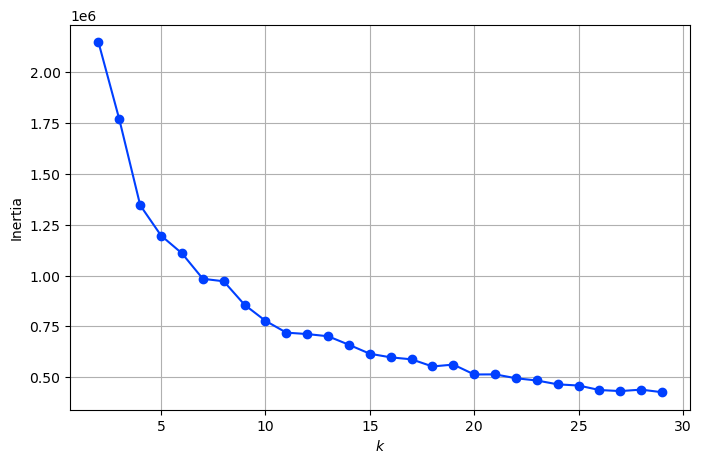

In [122]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform PCA with 10 components
X_embedded_pca = PCA(n_components=10).fit_transform(df_numeric)

# Fit KMeans models for each value of k and store the models in a list
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_embedded_pca)
                for k in range(2, 30, 1)]

# Extract the inertia values (within-cluster sum of squared distances) from each model
inertias = [model.inertia_ for model in kmeans_per_k]

# Plot the inertia for each k value to visualize the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 30, 1), inertias, "-o")
plt.xlabel("$k$")
plt.ylabel("Inertia")

# Add grid to the plot
plt.grid(True)

plt.show()


The Optimal Number of Clusters Seems to be 6, after which the additional components contribute much less.

In [123]:
from sklearn.cluster import KMeans

# Perform KMeans clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(X_embedded_pca)

# Add the clustering labels to the DataFrame
DF['y_kmeans'] = y_kmeans


In [124]:
DF.head()

orgyear    ctc  ctc_updated_year    yoe  num_jobs  growth  ctc_yoe_ratio  \
0    0.768 -0.138             0.372 -0.768    14.047  -0.013         -0.089   
1    0.768 -0.106             1.101 -0.768    14.047  -0.013         -0.059   
2    0.534 -0.009             0.372 -0.534    14.047  -0.009         -0.001   
3    0.067 -0.101             0.372 -0.067    12.234  -0.014         -0.091   
4   -0.401 -0.017             0.372  0.401    12.234   0.000         -0.067   

   mean_ctc_exp  mean_ctc_position  mean_ctc_company  is_other  is_developer  \
0        -0.170             -0.166            -0.220    -0.418         0.537   
1        -0.131             -0.150            -0.161    -0.418         0.537   
2        -0.059             -0.098            -0.035    -0.418         0.537   
3        -0.124              0.081            -0.102    -0.418         0.537   
4        -0.021              0.117             0.233     2.395        -1.861   

   is_management  is_sales  is_non_coder  ctc_bin  job_position  y_kmeans  
0         -0.275    -0.288        -0.448   -0.451         1.326         1  
1         -0.275    -0.288        -0.448    0.382        -1.114         1  
2         -0.275    -0.288        -0.448    1.215        -0.924         1  
3         -0.275    -0.288        -0.448    0.382        -1.159         1  
4         -0.275    -0.288         2.230    1.215        -0.280         1

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

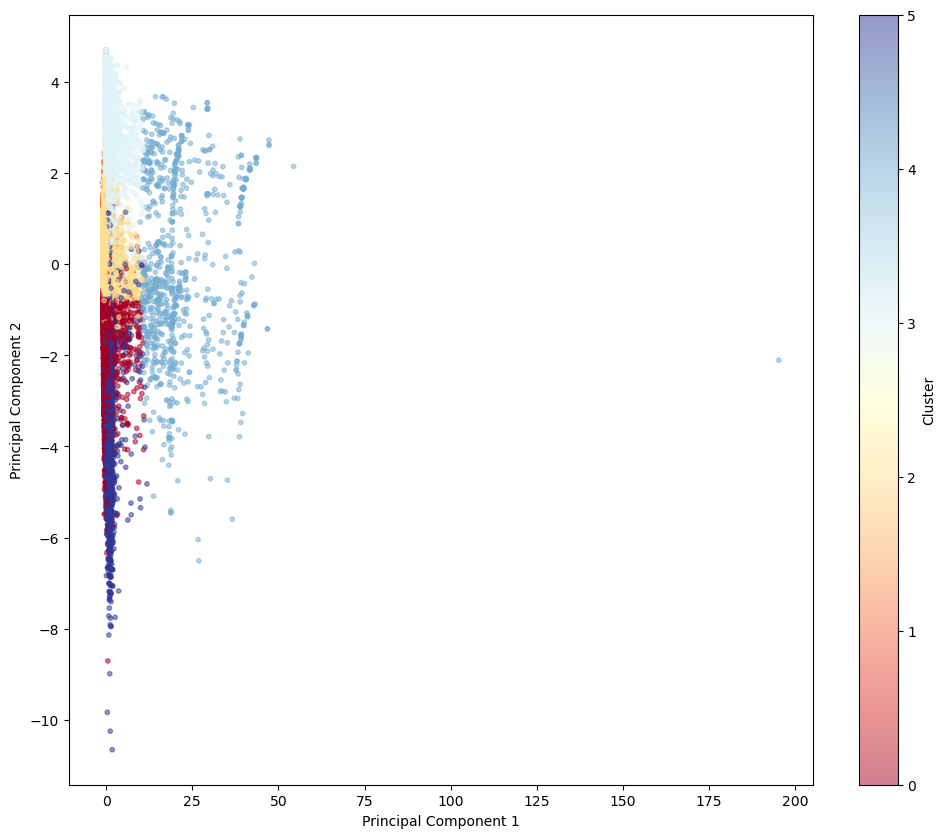

In [125]:
# Plotting the scatter plot with cluster colors
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_embedded_pca[:, 0], X_embedded_pca[:, 1], c=DF['y_kmeans'], s=10, cmap='RdYlBu', alpha=0.5)

# Add colorbar and labels
plt.colorbar(scatter, label='Cluster')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Cluster Analysis

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def create_polar_plot(data, features, cluster_label):
    """
    Creates a polar plot for a specific cluster, visualizing the means of its features.
    
    Parameters:
        data (array-like): Feature values for the cluster.
        features (list): List of feature names.
        cluster_label (int): The label or identifier for the cluster.
    """
    # Ensure data is a pandas Series for better handling
    data = pd.Series(data)
    
    num_vars = len(features)

    # Compute angle of each axis (in radians)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is made in a circular (polar) form, so we need to "close the loop"
    data = np.concatenate((data, [data.iloc[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.fill(angles, data, color='blue', alpha=0.25)
    ax.plot(angles, data, color='blue', linewidth=2)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)

    plt.title(f'Cluster {cluster_label}', size=20, color='blue', y=1.1)

    plt.show()

def create_combined_polar_plot(normalized_means, features, cluster_labels):
    """
    Creates a combined polar plot to compare clusters by visualizing the normalized means of their features.
    
    Parameters:
        normalized_means (DataFrame): DataFrame containing normalized means for each cluster.
        features (list): List of feature names.
        cluster_labels (list): List of cluster labels.
    """
    # Ensure normalized_means is a DataFrame
    if not isinstance(normalized_means, pd.DataFrame):
        normalized_means = pd.DataFrame(normalized_means, columns=features)
    
    num_vars = len(features)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

    for i, data in enumerate(normalized_means.values):
        data = np.concatenate((data, [data[0]]))  # Close the loop for the plot
        ax.fill(angles, data, alpha=0.25, label=f'Cluster {cluster_labels[i]}')
        ax.plot(angles, data, linewidth=2)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)

    plt.title('Cluster Comparison', size=20, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()


In [131]:
# Group the DataFrame by the 'y_kmeans' column and calculate the mean for each cluster
cluster_means = DF.groupby("y_kmeans").mean().reset_index()

# Drop unnecessary columns ('y_kmeans') from the resulting DataFrame
cluster_means = cluster_means.drop(["y_kmeans", "mean_ctc_exp", "mean_ctc_company", "mean_ctc_position"], axis=1)

# Initialize the MinMaxScaler for normalization
scaler = MinMaxScaler()

# Normalize the cluster means using MinMaxScaler
normalized_means = scaler.fit_transform(cluster_means)


In [132]:
cluster_means

orgyear    ctc  ctc_updated_year    yoe  num_jobs  growth  ctc_yoe_ratio  \
0   -0.921 -0.012            -0.782  0.921    -0.345  -0.012         -0.073   
1    0.461 -0.084             0.638 -0.461     1.816   0.062         -0.051   
2    0.457 -0.100             0.172 -0.457    -0.456  -0.014         -0.056   
3    0.285 -0.066             0.139 -0.285    -0.019  -0.008         -0.045   
4    0.203 10.922             0.428 -0.203    -0.354   0.123          9.758   
5   -1.266  0.014            -0.166  1.266    -0.187  -0.010         -0.061   

   is_other  is_developer  is_management  is_sales  is_non_coder  ctc_bin  \
0    -0.415         0.416         -0.274    -0.285        -0.445    0.533   
1    -0.414         0.419         -0.257    -0.182        -0.443   -0.034   
2    -0.418         0.352         -0.250    -0.186        -0.448   -0.290   
3     2.370        -1.861         -0.273    -0.286         2.230   -0.386   
4     0.637        -0.717          0.232     0.299         0.722    2.047   
5    -0.418        -0.305          3.496     3.023         0.220    0.652   

   job_position  
0         0.242  
1         0.319  
2         0.072  
3        -0.407  
4        -0.421  
5        -1.017

In [133]:
# Convert the columns of the DataFrame to a list
column_list = list(cluster_means.columns)


In [134]:
column_list

['orgyear',
 'ctc',
 'ctc_updated_year',
 'yoe',
 'num_jobs',
 'growth',
 'ctc_yoe_ratio',
 'is_other',
 'is_developer',
 'is_management',
 'is_sales',
 'is_non_coder',
 'ctc_bin',
 'job_position']

In [135]:
# Convert the columns of the DataFrame to a list
features = cluster_means.columns.tolist()


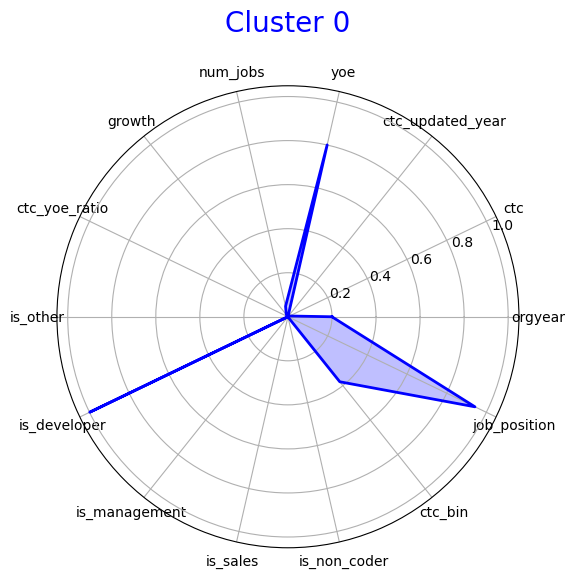

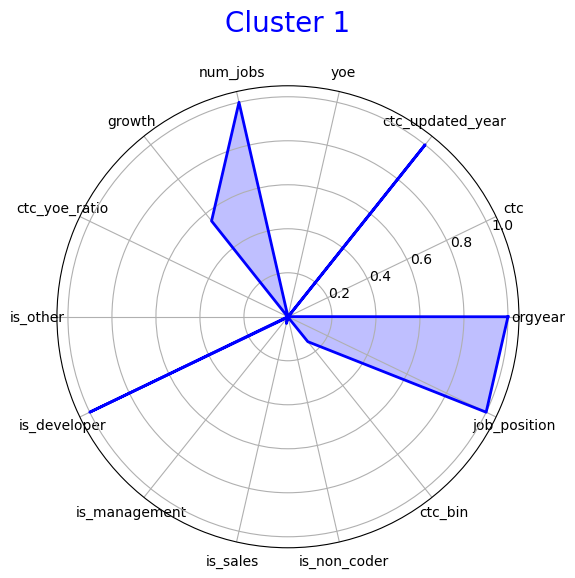

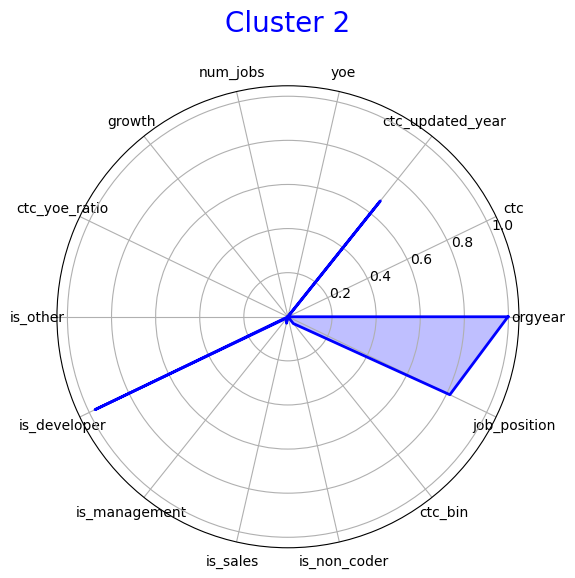

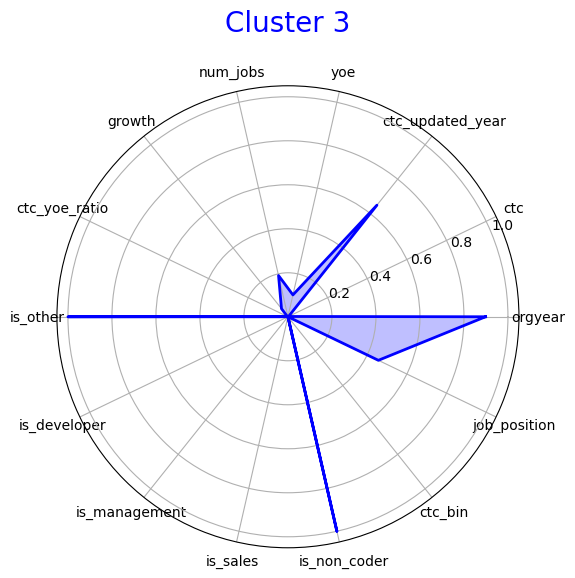

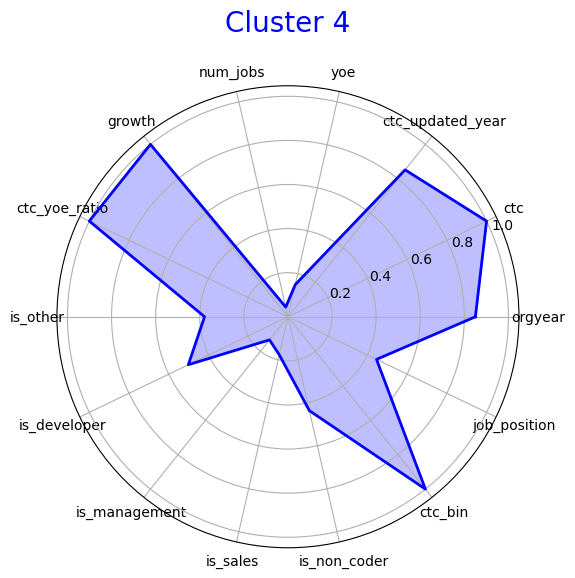

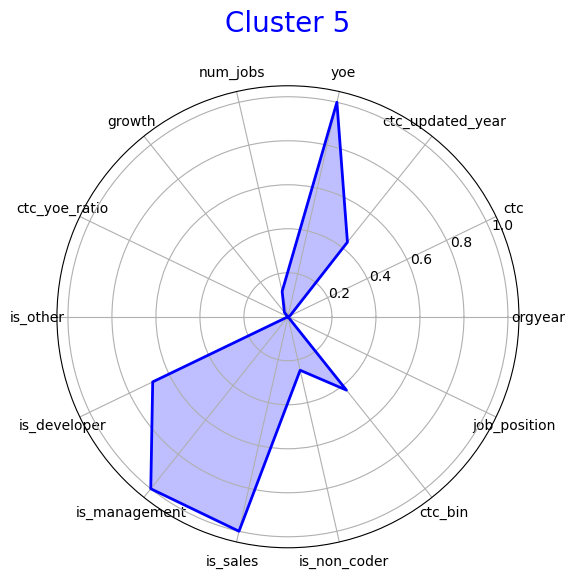

In [136]:
# Polar Plot

# Iterate over each cluster and create a polar plot
for cluster, data in enumerate(normalized_means):
    create_polar_plot(data, features, cluster)


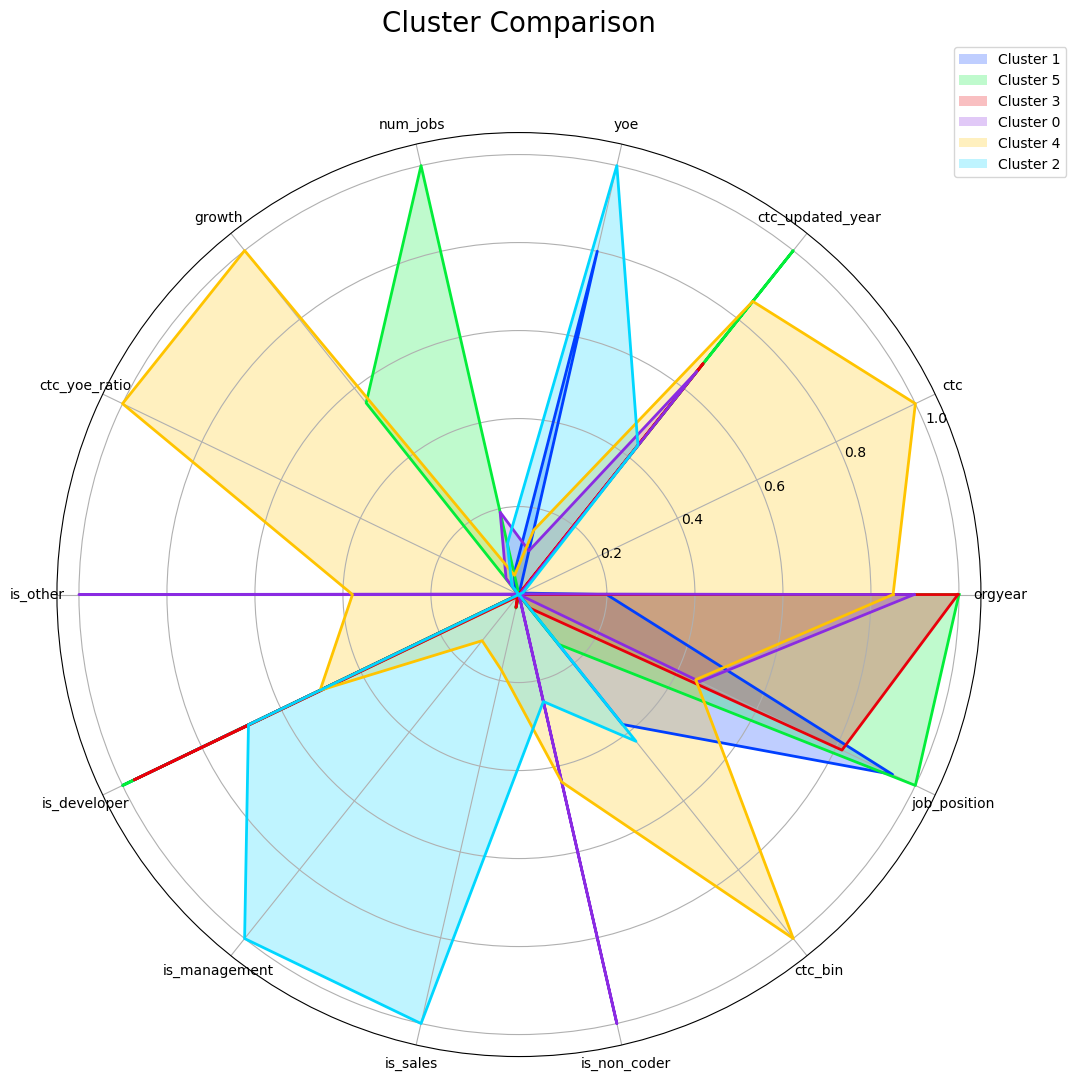

In [137]:
# Get the unique cluster labels from the 'y_kmeans' column and convert them to a list
cluster_labels = DF["y_kmeans"].dropna().unique().tolist()

# Create a combined polar plot for all clusters
create_combined_polar_plot(normalized_means, features, cluster_labels)


### Hierarchial Clustering

In [142]:
# Drop Mean_ctc_exp, Mean_ctc_company, Mean_ctc_position columns from the df_numeric

df_numeric = df_numeric.drop(["mean_ctc_exp", "mean_ctc_company", "mean_ctc_position"], axis=1)

In [144]:
X_embedded_pca = PCA(n_components=10).fit_transform(df_numeric)

In [145]:
# Reduce the sample size to 20% of the original data
sample = pd.DataFrame(X_embedded_pca).sample(frac=0.2, random_state=42)  # Adjust frac as needed
sample_hc = df_numeric.loc[sample.index]

# Verify the size of the reduced sample
print(f"Original data size: {len(X_embedded_pca)} rows")
print(f"Reduced sample size: {len(sample)} rows")


Original data size: 153443 rows
Reduced sample size: 30689 rows


In [146]:
sample_hc.shape

(30689, 14)

In [147]:
sample_hc.head()

orgyear    ctc  ctc_updated_year    yoe  num_jobs  growth  \
39677    0.534 -0.124            -0.357 -0.534    -0.456  -0.014   
48859   -0.167 -0.189            -3.274  0.167    -0.456  -0.014   
52702    0.300 -0.135            -0.357 -0.300    -0.456  -0.014   
69085    1.002 -0.147             1.101 -1.002    -0.456  -0.014   
17088    1.236 -0.167             0.372 -1.236     1.357  -0.014   

       ctc_yoe_ratio  is_other  is_developer  is_management  is_sales  \
39677         -0.089    -0.418         0.537         -0.275    -0.288   
48859         -0.139    -0.418        -1.861         -0.275    -0.288   
52702         -0.105    -0.418         0.537         -0.275    -0.288   
69085         -0.083    -0.418         0.537         -0.275    -0.288   
17088         -0.092     2.395        -1.861         -0.275    -0.288   

       is_non_coder  ctc_bin  job_position  
39677        -0.448   -0.451         1.326  
48859        -0.448   -1.284        -0.971  
52702        -0.448   -0.451         1.326  
69085        -0.448   -0.451        -0.736  
17088         2.230   -1.284        -0.280

Building Linkage Matrix

In [148]:
import time

start_time = time.time()
Z = fastcluster.linkage(sample, method='ward')
end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")

Execution time: 64.89967346191406 seconds


### Plot Dendogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [92.5, 92.5, 130.0, 130.0],
  [62.5, 62.5, 111.25, 111.25],
  [21.25, 21.25, 86.875, 86.875],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [190.0, 190.0, 220.0, 220.0],
  [162.5, 162.5, 205.0, 205.0],
  [54.0625, 54.0625, 183.75, 183.75],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [330.0, 330.0, 350.0, 350.0],
  [315.0, 315.0, 340.0

Text(0.5, 1.0, 'Dendrogram')

Text(0.5, 0, 'Cluster Index')

Text(0, 0.5, 'Distance')

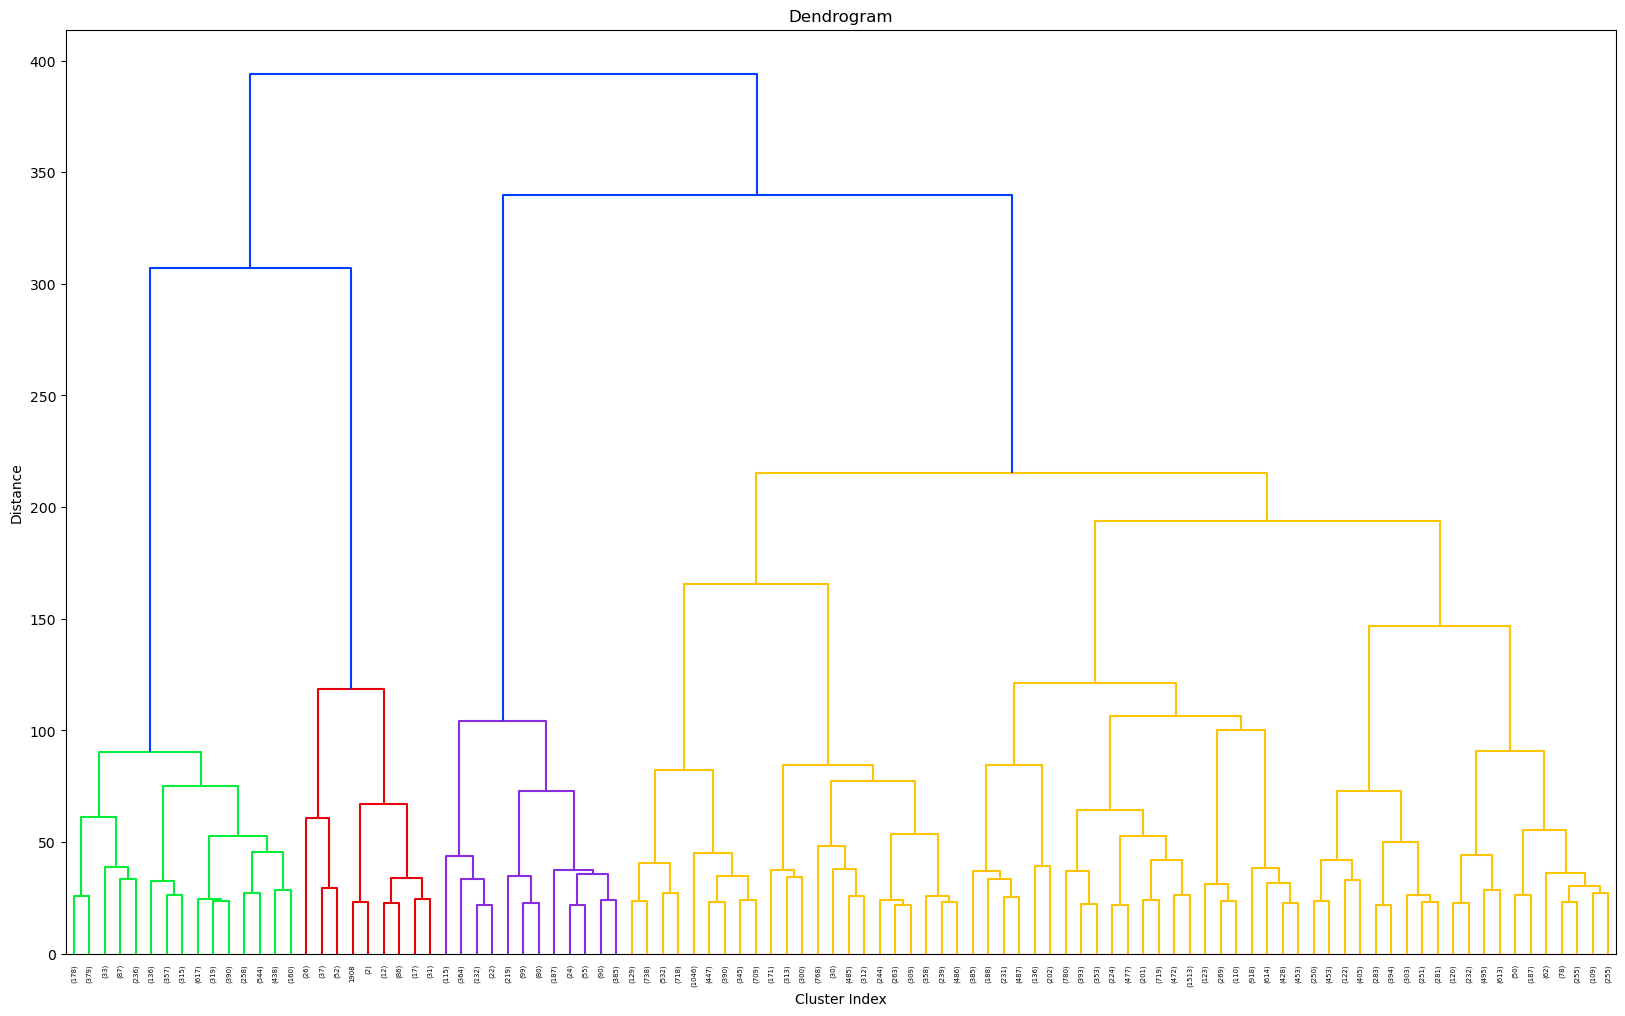

In [149]:
# Plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 12))
dendrogram(
    Z,
    truncate_mode='lastp',  # Show the last p merged clusters
    p=100,                   # Number of clusters displayed at the bottom
)
plt.title("Dendrogram")
plt.xlabel("Cluster Index")
plt.ylabel("Distance")
plt.show()


We will cut the Dendogram at 250 which will give us 8 Clusters

In [150]:
sample_hc["cluster"] = fcluster(Z, t=8, criterion="maxclust")

Plotting Hierarchial Clusters

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

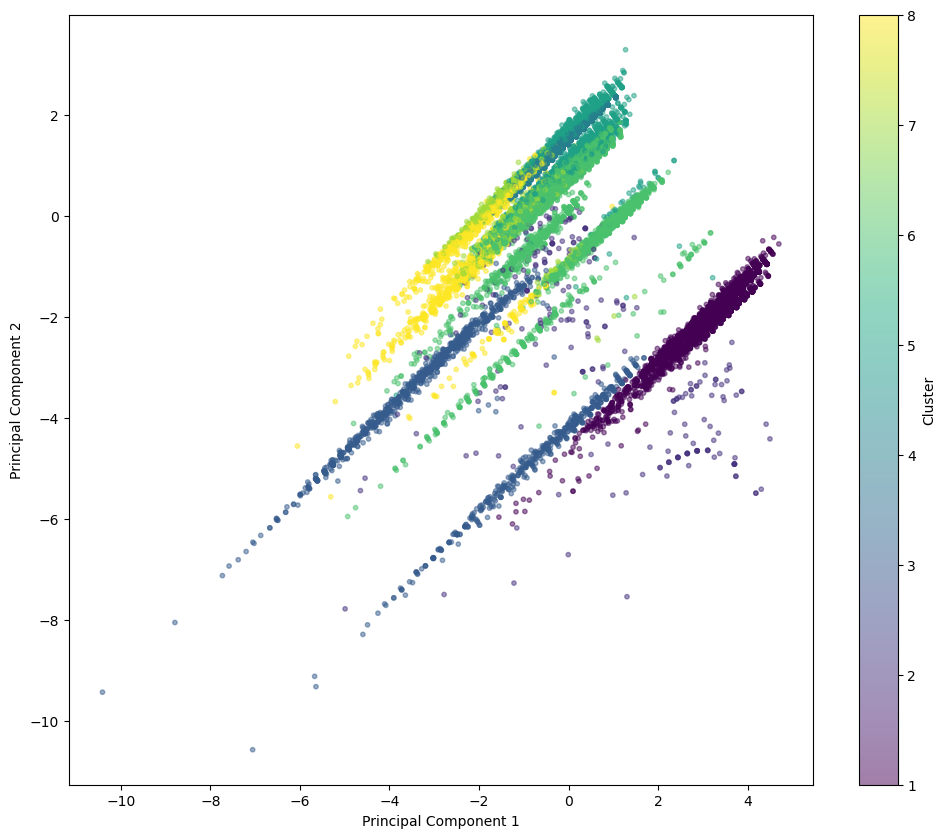

In [151]:
plt.figure(figsize=(12, 10))

# Create a scatter plot with the first two principal components
# The points are colored based on the cluster labels from the hierarchical clustering results
scatter = plt.scatter(
    sample.iloc[:, 0],  # X-axis: Principal Component 1
    sample.iloc[:, 1],  # Y-axis: Principal Component 2
    c=sample_hc["cluster"],  
    s=10,  
    cmap='viridis',  
    alpha=0.5  
)

plt.colorbar(scatter, label='Cluster')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()


Cluster Analysis

In [152]:
# Group the data by 'cluster' and calculate the mean for each cluster
cluster_means = sample_hc.groupby("cluster").mean()

# Initialize the MinMaxScaler for normalization
scaler = MinMaxScaler()

# Apply the MinMaxScaler to normalize the cluster means
normalized_means = scaler.fit_transform(cluster_means)

# Extract the feature names from the columns of the cluster means DataFrame
features = cluster_means.columns.to_list()


In [153]:
cluster_means

orgyear    ctc  ctc_updated_year    yoe  num_jobs  growth  \
cluster                                                              
1          0.310 -0.084             0.160 -0.310    -0.013  -0.009   
2          0.233  9.884             0.369 -0.233    -0.305   0.316   
3         -1.341  0.002            -0.184  1.341    -0.134  -0.013   
4          0.477 -0.090             0.298 -0.477    -0.456  -0.014   
5          0.439 -0.088             0.622 -0.439     1.790   0.032   
6          0.117 -0.106             0.102 -0.117    -0.386  -0.014   
7         -0.286 -0.094            -2.100  0.286    -0.366  -0.014   
8         -1.572 -0.025             0.001  1.572    -0.218  -0.014   

         ctc_yoe_ratio  is_other  is_developer  is_management  is_sales  \
cluster                                                                   
1               -0.066     2.395        -1.861         -0.275    -0.288   
2                8.616     0.467        -0.489          0.081     0.082   
3               -0.075    -0.418        -0.165          3.634     3.473   
4               -0.055    -0.418         0.537         -0.275    -0.288   
5               -0.058    -0.417         0.515         -0.268    -0.287   
6               -0.081    -0.418         0.155         -0.137    -0.093   
7               -0.096    -0.418         0.490         -0.275    -0.288   
8               -0.092    -0.418         0.421         -0.275    -0.288   

         is_non_coder  ctc_bin  job_position  
cluster                                       
1               2.230   -0.400        -0.403  
2               0.465    2.048        -0.233  
3               0.331    0.721        -0.994  
4              -0.448   -0.016         1.326  
5              -0.447    0.015         0.446  
6              -0.438   -0.188        -0.765  
7              -0.445   -0.022         0.442  
8              -0.446    0.715         0.597

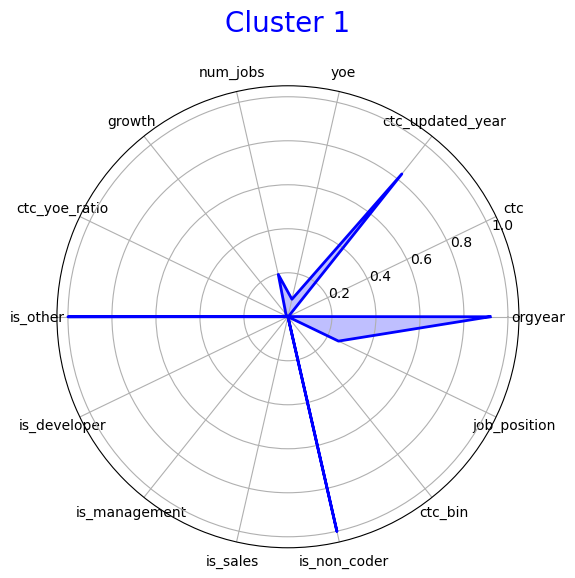

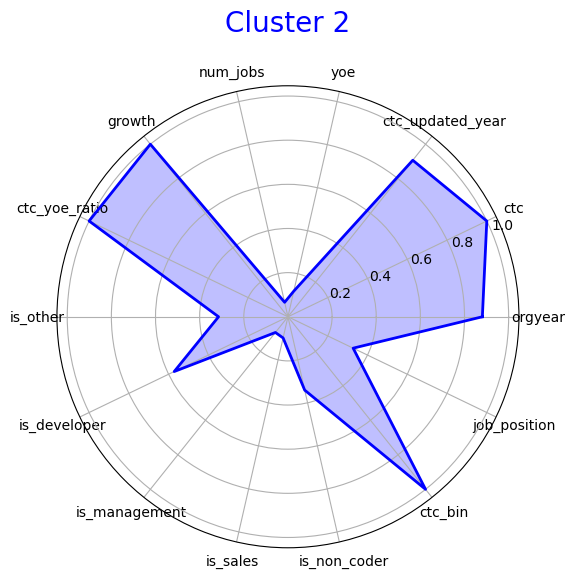

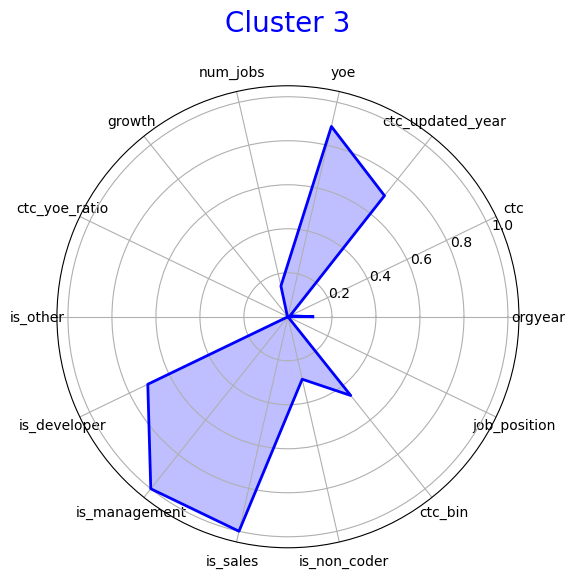

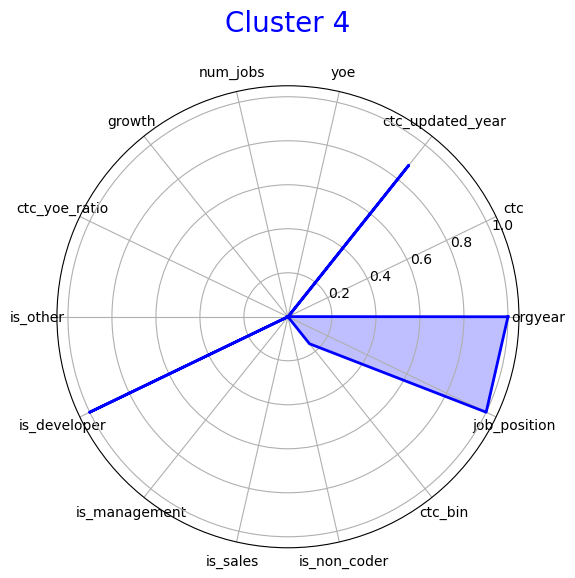

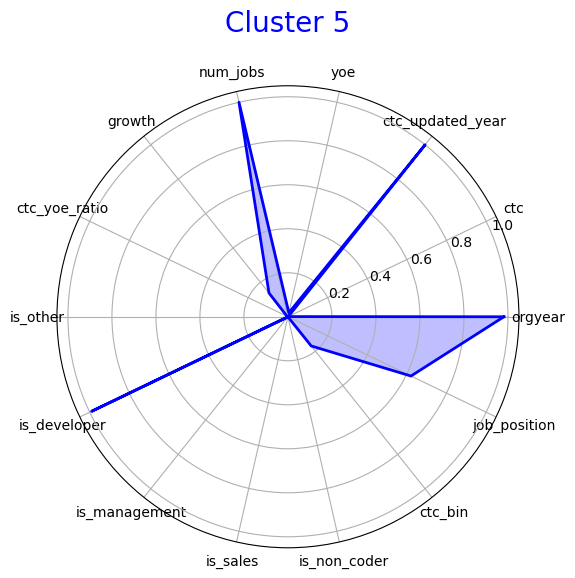

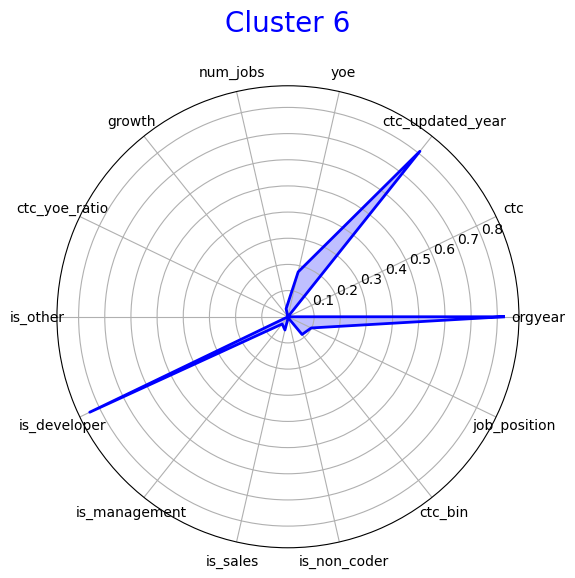

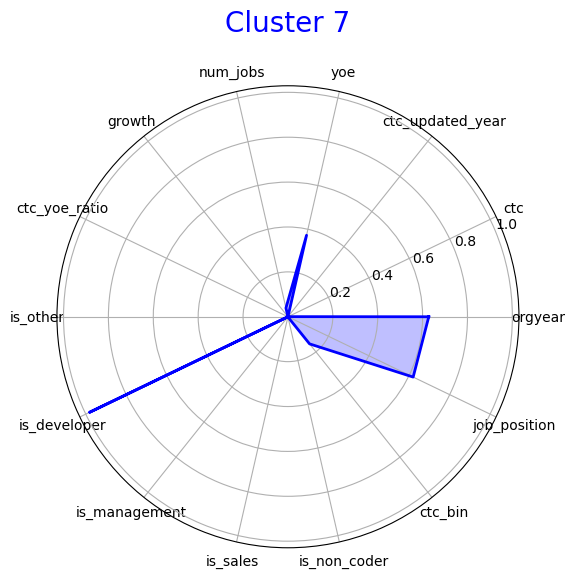

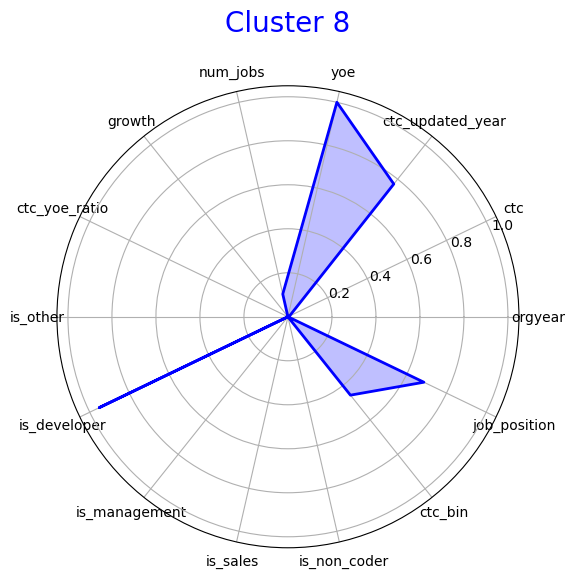

In [ ]:
for cluster_index in range(min(cluster_means.shape[0], normalized_means.shape[0])):
    create_polar_plot(normalized_means[cluster_index], features, cluster_index + 1)


In [158]:
sample_hc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30689 entries, 39677 to 105391
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   orgyear           30689 non-null  float64
 1   ctc               30689 non-null  float64
 2   ctc_updated_year  30689 non-null  float64
 3   yoe               30689 non-null  float64
 4   num_jobs          30689 non-null  float64
 5   growth            30689 non-null  float64
 6   ctc_yoe_ratio     30689 non-null  float64
 7   is_other          30689 non-null  float64
 8   is_developer      30689 non-null  float64
 9   is_management     30689 non-null  float64
 10  is_sales          30689 non-null  float64
 11  is_non_coder      30689 non-null  float64
 12  ctc_bin           30689 non-null  float64
 13  job_position      30689 non-null  float64
 14  cluster           30689 non-null  int32  
dtypes: float64(14), int32(1)
memory usage: 3.6 MB


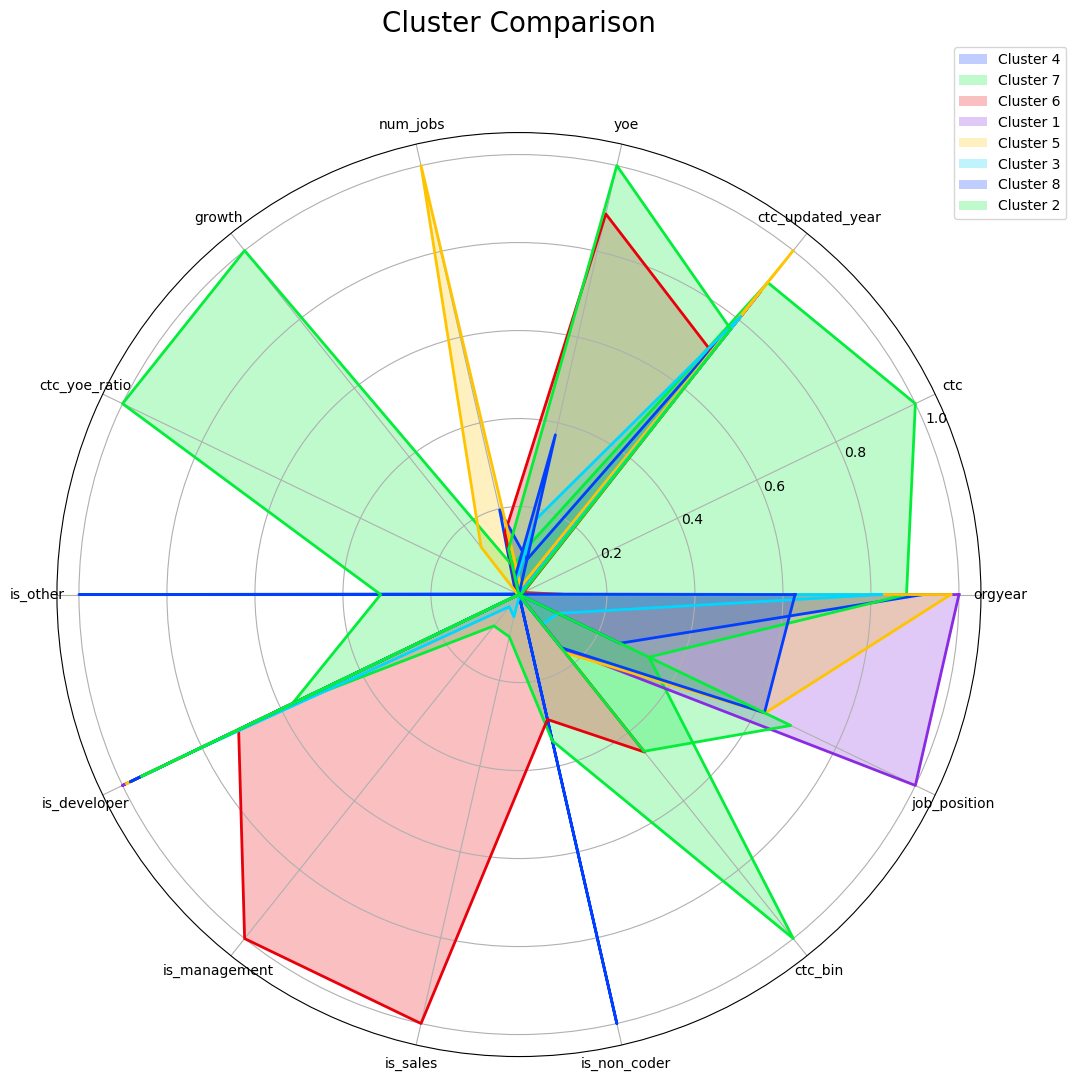

In [159]:
# Get the unique labels from the 'cluster' column and convert them to a list
cluster_labels = sample_hc['cluster'].dropna().unique().tolist()

# Create a combined polar plot for all clusters
create_combined_polar_plot(normalized_means, features, cluster_labels)


<Axes: xlabel='cluster'>

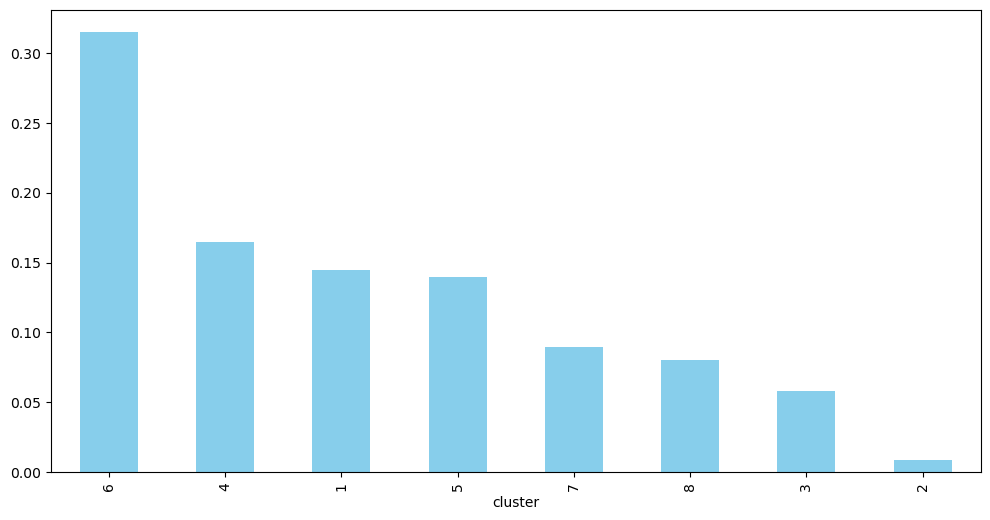

In [160]:
sample_hc['cluster'].value_counts(normalize=True).plot(kind='bar', figsize=(12, 6), color='skyblue')

cluster 6 containing developers has the highest count and cluster 2 containing non coders has the lowest count.

Years Of Experience Density Plot For Each Cluster

<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='yoe', ylabel='Density'>

Text(0.5, 1.0, 'Density Plot of Years of Experience by Cluster')

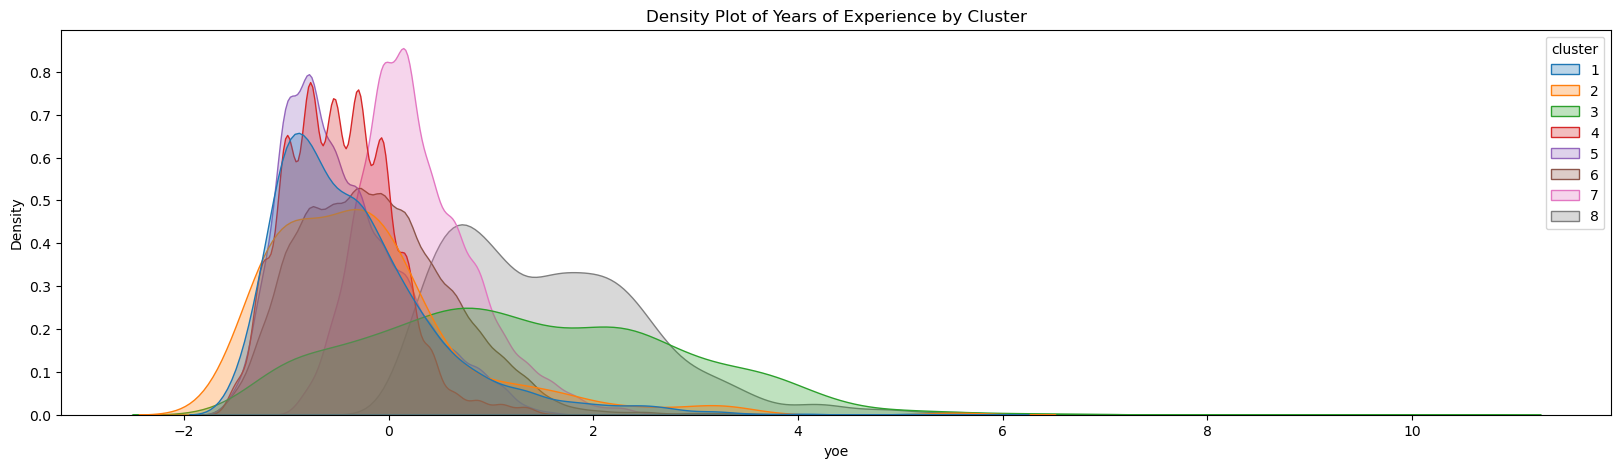

In [161]:
# Set up the figure size for the plot
plt.figure(figsize=(20, 5))

# Create a KDE (Kernel Density Estimation) plot using seaborn
sns.kdeplot(
    data=sample_hc,  
    x="yoe",         
    hue="cluster",    
    cbar=True,        
    fill=True,        
    common_norm=False,
    alpha=0.3,       
    palette="tab10"   
)

# Add a title to the plot for clarity
plt.title("Density Plot of Years of Experience by Cluster")
